# Computational Linear Algebra: PCA Homework

## Initialization:

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Ghiotti, Maddalena (s332834);
2. Zambon, Chiara (s329148).

In [1]:
StudentID1 = 332834
StudentID2 = 329148

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Music
Interests
*************************************
*** THESE ARE THE SELECTED FEATURES:
Unpopularity
Waiting
Decision making
Parents' advice
Life struggles
Workaholism
Funniness
Dreams
Responding to a serious letter
God
Knowing the right people
Giving
Eating to survive
Elections
Reliability
Borrowed stuff
Personality
Criminal damage
Happiness in life
Punctuality
Empathy
Fake
Finding lost valuables
Lying
Charity
Energy levels
Judgment calls
Friends versus money
Questionnaires or polls
Keeping promises
Writing notes
Prioritising workload
Socializing
Thinking ahead
Final judgement
Interests or hobbies
Internet usage
Small - big dogs
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
Music
Slow songs or fast songs
Dance
Folk
Country
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Rock n roll
Alter

## Importing Modules

In the following cell, we import the modules necessary for the  homework.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
import matplotlib 
from IPython.display import display

### Organizing features

We now build a DataFrame with the selected features and their corresponding types. We assign a color for each type and a different color for aech category. Each of the three categories comprehends multiple types. A new DataFrame is then created keeping the only categories selected for the analysis.
Additionaly, we save the types colors in a dictionary.

In [4]:
#Available categories and corresponding types
var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

#Map each category to a different color
cat_color = {'Entertainment': 'green','Personal': 'red', 'Fixed': 'black'}
cmap = cm.Pastel1.colors#[::-1] #cm.tab20.colors  #Selected colormap
features_data = []   #List for collecting data
count = 0 
type_color ={}
color_cat =''
for key, values in variables_by_type.items():
    if key in these_types:
        if key in var_entertainment_feat_types:
            color_cat = cat_color['Entertainment']   #Assign the color to entertainment category features
        elif key in var_personal_feat_types:
            color_cat = cat_color['Personal']   #Assign the color to personal category features
        else:
            color_cat = cat_color['Fixed']   #Assign the color to fixed category features
        for variable in values:
            features_data.append({'Type': key, 'Feature': variable, 'Color type':cmap[count], 'Color category':color_cat})  #Save data of each feature in list
        type_color[key] = cmap[count]   #Collect the colors assigned to different types in an array
        count += 1
features_df = pd.DataFrame(features_data)   #Convert the list to DataFrame

selected_features_df = features_df.loc[features_df['Feature'].isin(these_features),:].set_index('Feature')  #Crop the featre dataset to keep only features selected for the analysis

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

### Load the dataset

In the following cell the csv file is read and saved into a dataframe structure. From the entire dataset, 2/3 of the records are sampled, keeping a fixed random seed. The first and last rows of the dataframe are showned below.

In [5]:
file_path = './responses_hw.csv'
X_df_load = pd.read_csv(file_path).sample(frac=2/3,random_state=random_seed)  #Read from file and sample
X_df = X_df_load.loc[:, these_features]  #Keep just the selected features
display(X_df)

Unpopularity  Waiting  Decision making  Parents' advice  Life struggles  \
324           4.0      4.0              3.0              4.0             3.0   
648           3.0      3.0              3.0              3.0             4.0   
531           3.0      4.0              4.0              1.0             2.0   
272           5.0      2.0              4.0              3.0             5.0   
965           5.0      1.0              1.0              3.0             5.0   
..            ...      ...              ...              ...             ...   
351           3.0      3.0              3.0              4.0             4.0   
884           5.0      2.0              3.0              3.0             5.0   
901           3.0      4.0              3.0              4.0             4.0   
300           5.0      3.0              5.0              3.0             5.0   
437           3.0      1.0              5.0              3.0             5.0   

     Workaholism  Funniness  Dreams  Responding to a serious letter  God  ...  \
324          2.0        4.0       4                             4.0  5.0  ...   
648          3.0        4.0       4                             3.0  4.0  ...   
531          5.0        2.0       3                             5.0  3.0  ...   
272          5.0        4.0       3                             3.0  4.0  ...   
965          1.0        1.0       5                             5.0  3.0  ...   
..           ...        ...     ...                             ...  ...  ...   
351          4.0        4.0       3                             1.0  5.0  ...   
884          2.0        5.0       3                             3.0  4.0  ...   
901          5.0        1.0       3                             3.0  4.0  ...   
300          5.0        1.0       4                             4.0  5.0  ...   
437          1.0        1.0       3                             3.0  2.0  ...   

     Passive sport  Active sport  Gardening  Celebrities  Shopping  \
324            3.0           1.0        1.0          4.0       4.0   
648            4.0           4.0        1.0          1.0       3.0   
531            5.0           3.0        2.0          1.0       2.0   
272            1.0           2.0        2.0          1.0       2.0   
965            3.0           5.0        2.0          5.0       5.0   
..             ...           ...        ...          ...       ...   
351            5.0           5.0        4.0          4.0       5.0   
884            5.0           3.0        1.0          5.0       5.0   
901            3.0           1.0        1.0          1.0       2.0   
300            1.0           3.0        3.0          1.0       3.0   
437            4.0           2.0        1.0          2.0       2.0   

     Science and technology  Theatre  Fun with friends  Adrenaline sports Pets  
324                     2.0      3.0               5.0                4.0  3.0  
648                     2.0      5.0               5.0                3.0  2.0  
531                     4.0      1.0               5.0                3.0  1.0  
272                     4.0      5.0               5.0                1.0  5.0  
965                     3.0      3.0               5.0                3.0  1.0  
..                      ...      ...               ...                ...  ...  
351                     3.0      3.0               5.0                4.0  5.0  
884                     1.0      5.0               5.0                1.0  5.0  
901                     1.0      5.0               4.0                2.0  5.0  
300                     3.0      4.0               2.0                3.0  2.0  
437                     2.0      2.0               5.0                3.0  1.0  

[673 rows x 102 columns]

### Handle categorical features

We want to handle categorical features. At this purpose, we filtered the available features and displayed below the ones not of type int nor float.

In [6]:
work_X_df = X_df.copy()
print('Categorical features: ')
print(work_X_df.select_dtypes(exclude=['float','int']).columns)

Categorical features: 
Index(['Punctuality', 'Lying', 'Internet usage', 'Smoking', 'Alcohol'], dtype='object')


Looking at the provided file and starting from the assumption that even categorical features are orderable, let's now observe which values are present in these selected columns.

#### Internet usage

In the following table the number of records for each value of "Internet usage" is reported. As we can notice the different groups are not balanced. However, since the values represent time, and are ordered (as assumed), we can map each value to an integer number between 0, 1, 2 and 3, where 0 represents no usage, while 3 represents long time of usage. 

In [7]:
values, count = np.unique(work_X_df['Internet usage'].values, return_counts=True)  #Find unique values and their count
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values                        
few hours a day            501
less than an hour a day     89
most of the day             81
no time at all               2

In [8]:
#Map to integers
work_X_df.loc[work_X_df['Internet usage']=='no time at all','Internet usage']=0
work_X_df.loc[work_X_df['Internet usage']=='less than an hour a day','Internet usage']=1
work_X_df.loc[work_X_df['Internet usage']=='few hours a day','Internet usage']=2
work_X_df.loc[work_X_df['Internet usage']=='most of the day','Internet usage']=3

The same procedure is applied for the other categorical features.

#### Lying

In [9]:
values, count = np.unique(work_X_df['Lying'].dropna().values, return_counts=True)
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values                              
sometimes                        369
only to avoid hurting someone    184
everytime it suits me             88
never                             30

In [10]:
work_X_df.loc[work_X_df['Lying']=='never','Lying']=0
work_X_df.loc[work_X_df['Lying']=='only to avoid hurting someone','Lying']=1
work_X_df.loc[work_X_df['Lying']=='sometimes','Lying']=2
work_X_df.loc[work_X_df['Lying']=='everytime it suits me','Lying']=3

#### Punctuality

In [11]:
values, count = np.unique(work_X_df['Punctuality'].dropna().values, return_counts=True)
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values        
on time    273
early      215
late       184

In [12]:
work_X_df.loc[work_X_df['Punctuality']=='early','Punctuality']=0
work_X_df.loc[work_X_df['Punctuality']=='on time','Punctuality']=1
work_X_df.loc[work_X_df['Punctuality']=='late','Punctuality']=2

#### Smoking

In [13]:
values, count = np.unique(work_X_df['Smoking'].dropna().values, return_counts=True)
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values               
tried smoking     287
never smoked      138
current smoker    126
former smoker     115

In [14]:
work_X_df.loc[work_X_df['Smoking']=='never smoked','Smoking']=0
work_X_df.loc[work_X_df['Smoking']=='tried smoking','Smoking']=1
work_X_df.loc[work_X_df['Smoking']=='former smoker','Smoking']=2
work_X_df.loc[work_X_df['Smoking']=='current smoker','Smoking']=3

#### Alcohol

In [15]:
values, count = np.unique(work_X_df['Alcohol'].dropna().values, return_counts=True)
display(pd.DataFrame({'Values': values, 'Count': count}).sort_values(by='Count', ascending=False).set_index('Values'))

Count
Values               
social drinker    450
drink a lot       142
never              77

In [16]:
work_X_df.loc[work_X_df['Alcohol']=='never','Alcohol']=0
work_X_df.loc[work_X_df['Alcohol']=='social drinker','Alcohol']=1
work_X_df.loc[work_X_df['Alcohol']=='drink a lot','Alcohol']=2

We here converted all the features types to float.

In [17]:
work_X_df = work_X_df.astype({'Internet usage': 'float', 'Lying': 'float','Punctuality': 'float','Smoking': 'float','Alcohol': 'float'})

### Handle missing values

Before deciding a strategy for missing values management, we have explored the dataset in these terms.

In [18]:
noNull_X_df = work_X_df.dropna()
print('The number of rows with no null values is: ',noNull_X_df.shape[0])
threshNull_X_df = work_X_df.dropna(thresh=work_X_df.shape[1]*4//5)
print('The number of rows with at least 80% no null values is: ',threshNull_X_df.shape[0])

The number of rows with no null values is:  489
The number of rows with at least 80% no null values is:  673


Looking at columns, we can notice that most of the missing values are in "Passive sport" and only 15 columns have more than 4 missing values (see the list below).

In [19]:
col_null_count = work_X_df.isnull().sum().sort_values(axis=0, ascending=False)
col_null_count[col_null_count>=5]

Passive sport            12
Chemistry                 9
Gardening                 7
Smoking                   7
Final judgement           6
Countryside, outdoors     6
Punk                      6
Techno, Trance            5
Rock n roll               5
Friends versus money      5
Foreign languages         5
Economy Management        5
Alternative               5
Reggae, Ska               5
Socializing               5
dtype: int64

As we can see, the rows with no missing values are way less than the total number of sampled rows of the dataset (673).
Establishing a threshold $\tau=20\%$, we can see that all the rows have less than $\tau$ of missing values. For this reason, we decided to keep for the analysis all the rows sampled.

In [20]:
print('Minimum value between all features:', work_X_df.min().min())
print('Maximum value between all features:', work_X_df.max().max())

Minimum value between all features: 0.0
Maximum value between all features: 5.0


The values of each column in the dataset represent grades in the range [0,5]. For this reason we decided to fill missing values with the mean of the values in the corresponding column. In this manner, people with missing answers are assumed to have an average opinion in the missing field.

In [21]:
filled_X_df = work_X_df.fillna(np.mean(work_X_df))

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

### Application of scalers

The applization of a standard scaler and a min-max scaler follows.

In [22]:
Xstd_df = pd.DataFrame(StandardScaler().fit(filled_X_df.values).transform(filled_X_df.values), columns=filled_X_df.columns)
Xmm_df = pd.DataFrame(MinMaxScaler().fit(filled_X_df.values).transform(filled_X_df.values), columns=filled_X_df.columns) #Range = [0,1]

### Variance analysis

We now want to see how the variance varies between the original dataset and the ones obtained with the scalers.

In [23]:
#Creation of a dataframe with the value of variance for each column and each dataset
var = pd.DataFrame({'Variance': filled_X_df.var(), 'Standard Scaled Variance': Xstd_df.var(), 'MinMax Scaled Variance': Xmm_df.var()})
display(var)

#Creation of a dataframe with the mean variance along all features and the associated variance, for each of the three datset
var_summ = pd.DataFrame({'Variance mean': var.mean(), 'Variance variance': var.std(), 'Variance min': var.min(), 'Variance max': var.max()})
display(var_summ)

Variance  Standard Scaled Variance  \
Unpopularity            1.275234                  1.001488   
Waiting                 1.029920                  1.001488   
Decision making         1.462544                  1.001488   
Parents' advice         0.742999                  1.001488   
Life struggles          1.917432                  1.001488   
...                          ...                       ...   
Science and technology  1.680888                  1.001488   
Theatre                 1.723134                  1.001488   
Fun with friends        0.521228                  1.001488   
Adrenaline sports       2.004231                  1.001488   
Pets                    2.421940                  1.001488   

                        MinMax Scaled Variance  
Unpopularity                          0.079702  
Waiting                               0.064370  
Decision making                       0.091409  
Parents' advice                       0.046437  
Life struggles                        0.119840  
...                                        ...  
Science and technology                0.105056  
Theatre                               0.107696  
Fun with friends                      0.057914  
Adrenaline sports                     0.125264  
Pets                                  0.151371  

[102 rows x 3 columns]

Variance mean  Variance variance  Variance min  \
Variance                       1.472263       4.906810e-01      0.264563   
Standard Scaled Variance       1.001488       3.493410e-16      1.001488   
MinMax Scaled Variance         0.093658       2.867799e-02      0.026004   

                          Variance max  
Variance                      2.421940  
Standard Scaled Variance      1.001488  
MinMax Scaled Variance        0.151371

One striking observation is the variance of the data's variance after applying the Standard Scaler. The Standard Scaler is designed to transform the values in each column so that they have a mean of 0 and a standard deviation of 1. Consequently, the variance of each column, once scaled, should ideally equal 1. As seen in the table above, the mean variance after scaling is approximately 1, which aligns with expectations. However, it is not exactly 1, likely due to rounding errors and the underlying computation methods. Notably, the variance of the column-wise variances after scaling is very close to the machine precision, indicating that the differences are negligible and that all columns' variances are effectively the same (approximately 1.001488).

To further explore the differences in variance between the original data and the data transformed using the Min-Max Scaler, we plotted the distributions of variance across the different features.

<function matplotlib.pyplot.show(close=None, block=None)>

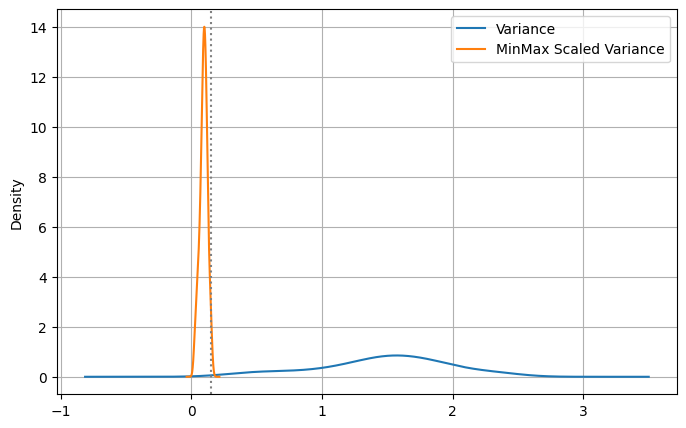

In [24]:
fig = plt.figure(figsize=(8,5))
var['Variance'].plot.density()
var['MinMax Scaled Variance'].plot.density()
plt.axvline(0.15, linestyle=':', color='gray')
plt.legend(loc='upper right')
plt.grid()
plt.show

The sample variance is computed using the formula:

$$ s^2 = \frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N-1}$$

Both the original dataset and the transformed dataset have the same number of samples, $N$. The key difference lies in the distance of each sample value from the mean of the corresponding feature. When applying the Min-Max Scaler, we rescale the values in the range $R = [0, 5]$ to fit within a new range $R' = [0, 1]$. This transformation reduces the mean of the values in each column and also decreases the distance of each value from its column mean. A smaller average distance from the mean leads to a lower variance for each column. This explains why, in the graph above, the "peak" or "center" of the variance distribution for the scaled data shifts toward lower values on the x-axis.

Now, let’s analyze the formula above more closely. After scaling, all values of a given column lie within the range $R'$. Consequently, the mean of these values must also fall within $R'$. Additionally, the maximum possible distance between any value and the mean cannot exceed 1. Squaring a positive number less than or equal to 1 will always yield a result in the range $[0, 1]$. Computing the average of these squared distances (as in the variance formula) will similarly produce a result within $R'$. Therefore, the variance of a column after scaling will always be less than or equal to 1.

The orange distribution (representing the scaled data) is also narrower than the blue distribution (representing the original data). The dotted gray line at $x = 0.15$ indicates the approximate maximum variance observed for the Min-Max scaled data. From the variance formula, this means that the mean of the squared distances from the mean value is about 0.15. Taking the square root of this value gives an average distance of approximately:

$$\sqrt{0.15} \approx 0.387 \sim 0.4$$

This is reasonable, given that the values are compressed into the range $R'$. The mean is expected to be around 0.5, and the maximum possible distance of any value from the mean cannot exceed 0.5 in this case.

Let’s hypothesize a scenario where all values in a column are at their maximum possible distance from the mean (assumed to be 0.5). In this case, the distances are all 0.5. Substituting this into the variance formula, the sample variance would be:

$$ s^2 = \frac{\sum_{i=1}^{N}(x_i - \bar{x})^2}{N-1} = \frac{\sum_{i=1}^{N}0.5^2}{N-1} = \frac{N}{N-1}0.25 \sim 0.25$$

Even in this extreme case, the variance remains relatively small compared to the variances of the original data. Higher values can be obtained by assuming a mean values different from 0.5, but the variance can not exceed 1 anyways.


We could apply a similar reasoning to the distribution obtained from the original data. In this case, we can demostrate that the "peak" or "center" of the variance distribution is shifted toward higher values, and the distribution curves are wider.

Another important consideration arises when analyzing the effects of the Min-Max Scaler. If, while answering the survey, respondents avoid extreme answers (e.g., no one chooses 1 nor 5), the highest value present in the data (e.g., 4) will still be mapped to the maximum of the scaled range $R'$, which is 1, and the minimum (e.g., 2) to 0. Consequently, an answer of 4 for one feature would take the same scaled value as an answer of 5 for another feature, potentially distorting the relative "weights" participants assign to different questions.

In the original data, these differences in weights can influence the variance distribution, even though this specific scenario (all extreme values being absent) is quite unlikely to occur.

### PC analysis

We apply now the _Principal Component Analysis_ (PCA) to the three datasets obteined. We initialy choose to keep all the _principal compoents_ (PCs) and all the samples, in order to execute a preliminary analysis.

In [25]:
pca_X = PCA().fit(filled_X_df.values)  #Build and fit a pca on original data
pca_Xstd = PCA().fit(Xstd_df.values)  #Build and fit a pca on standard scaled data
pca_Xmm = PCA().fit(Xmm_df.values)  #Build and fit a pca on min-max scaled data

Here we show the cumulative explained variance and the scree plot for each dataset. The PCs are sorted from the one with the largest explained variance to the one with the lowest.

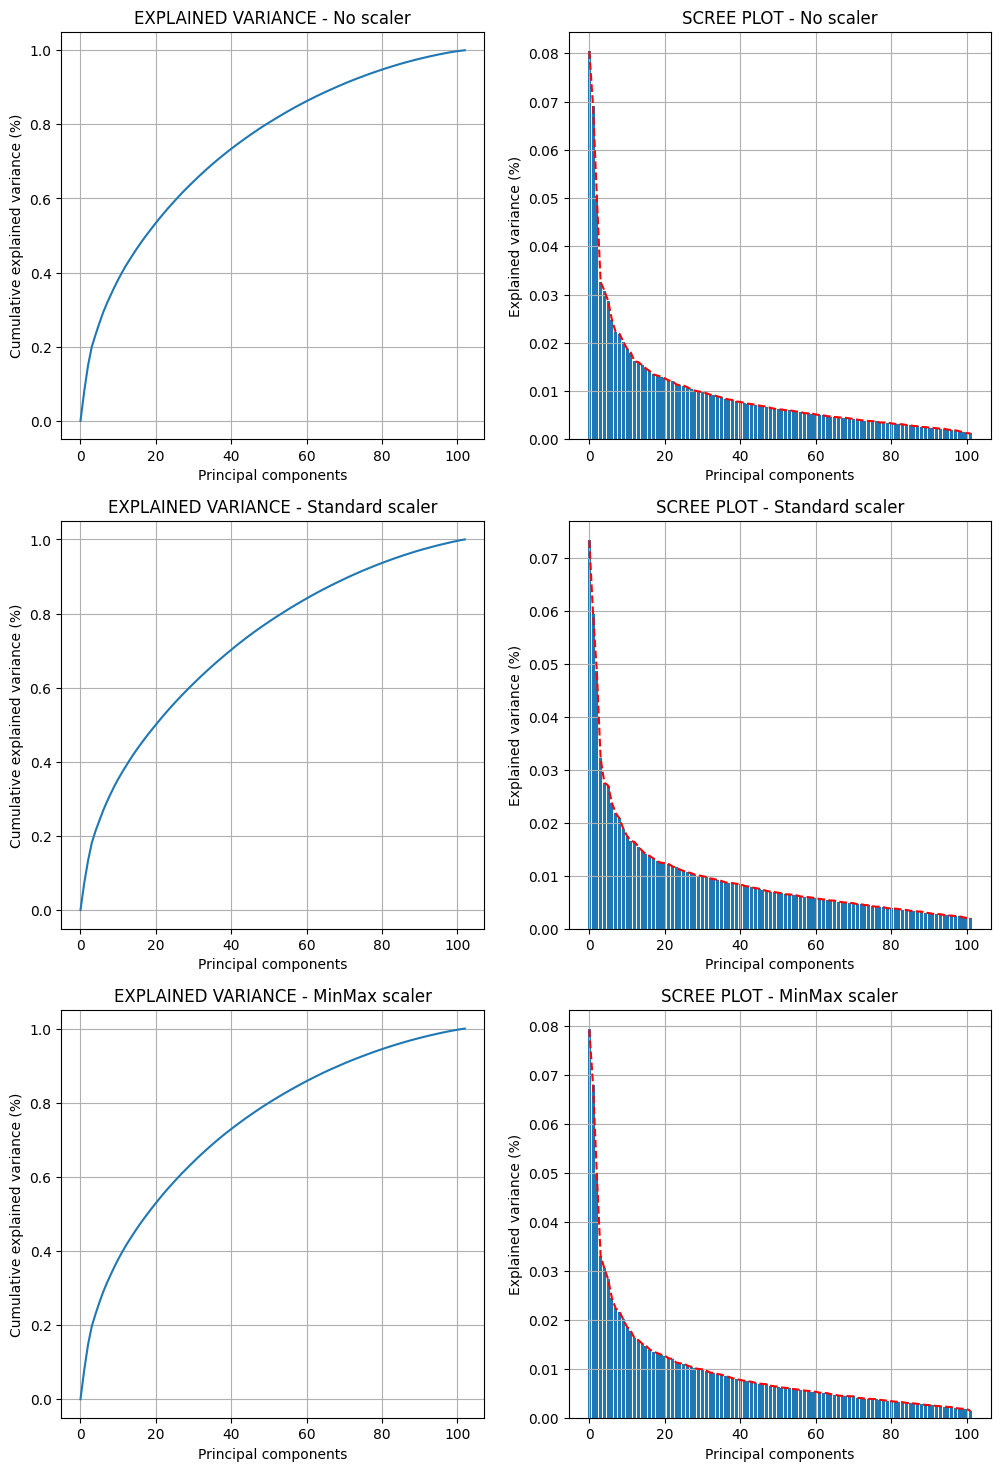

In [26]:
plt.figure(figsize=(12,18))
plt.subplot(3,2,1)
#Explained variance representation for no scaled data
plt.title('EXPLAINED VARIANCE - No scaler')
plt.plot(np.insert(np.cumsum(pca_X.explained_variance_ratio_), 0, 0))
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()

plt.subplot(3,2,2)
plt.title('SCREE PLOT - No scaler')
plt.bar(np.arange(pca_X.n_features_in_), pca_X.explained_variance_ratio_)
plt.plot(np.arange(pca_X.n_features_in_), pca_X.explained_variance_ratio_, 'r--')
plt.xlabel('Principal components')
plt.ylabel('Explained variance (%)')
plt.grid()

plt.subplot(3,2,3)
#Explained variance representation for standard scaled data
plt.title('EXPLAINED VARIANCE - Standard scaler')
plt.plot(np.insert(np.cumsum(pca_Xstd.explained_variance_ratio_), 0, 0))
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()

plt.subplot(3,2,4)
plt.title('SCREE PLOT - Standard scaler')
plt.bar(np.arange(pca_Xstd.n_features_in_), pca_Xstd.explained_variance_ratio_)
plt.plot(np.arange(pca_Xstd.n_features_in_), pca_Xstd.explained_variance_ratio_, 'r--')
plt.xlabel('Principal components')
plt.ylabel('Explained variance (%)')
plt.grid()

plt.subplot(3,2,5)
#Explained variance representation for min-max scaled data
plt.title('EXPLAINED VARIANCE - MinMax scaler')
plt.plot(np.insert(np.cumsum(pca_Xmm.explained_variance_ratio_), 0, 0))
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.grid()

plt.subplot(3,2,6)
plt.title('SCREE PLOT - MinMax scaler')
plt.bar(np.arange(pca_Xmm.n_features_in_), pca_Xmm.explained_variance_ratio_)
plt.plot(np.arange(pca_Xmm.n_features_in_), pca_Xmm.explained_variance_ratio_, 'r--')
plt.xlabel('Principal components')
plt.ylabel('Explained variance (%)')
plt.grid()

#plt.savefig('Media_Varianza',dpi=300)
plt.show()

As the graphs show, the trends of the three curves on the left are very similar. The curves grows progressively, without significant steps. The lack of steps, expecially at the beginning, is what we expected, since all the features of the original dataset have values falling in the same range, $R$. Steps in the curve are more likely to appear when a dominant feature, with values in a larger range, "steals" the whole variance.\
The curves on the right show the variance distribution for each dataset, and they are similar as well.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [27]:
#Base number of PCs
m=5

The following cell creates a list of two elements: the first element represents the number of the components required to explain 33% of the total variance in the standard scaled data, and the second element represents the number of the components required to explain 33% of the total variance in the min-max scaled data.

In [28]:
m_perc = []
m_perc.append(int(np.argwhere((np.cumsum(pca_Xstd.explained_variance_ratio_)>=0.33)== True)[0][0])+1)
m_perc.append(int(np.argwhere((np.cumsum(pca_Xmm.explained_variance_ratio_)>=0.33)== True)[0][0])+1)

Comparing both the results of the previous cell with our threshold, 5, we see that the minimum number of components required to explain 33% of the total variance in both datasets is greater than 5, so 5 PCs are going to be selected.

In [29]:
np.array(m_perc)>m  #Commpare with threshold 5

array([ True,  True])

The two PCA transformations for the standard scaled and min-max scaled data are done using 5 principal components. All samples are taken into account.

In [30]:
pca_std = PCA(m,random_state=random_seed)  #Build the pca for standard scaled data
pca_mm = PCA(m,random_state=random_seed)  #Build the pca for min-max scaled data

pca_Xstd_m = pca_std.fit(Xstd_df.values).transform(Xstd_df.values)  #Fit and transform the standard scaled data
pca_Xmm_m = pca_mm.fit(Xmm_df.values).transform(Xmm_df.values)  #Fit and transform the min-max scaled data

### Standard scaled data PCs visualization

The two threshold values in the cell below have been estrablished on a graphical basis, after plotting the "features contributions" graphs, visible below the following cell.

The first value has the purpose of identifieng the very few features that bring a positive or negative considerable contribution to the analyzed PC. The second value, helps with a more general view of the contribution of each group of features to the analyzed PC.

In [31]:
# Defining the threshold value
eps1 = 0.15
eps2 = 0.1
#eps = np.sqrt(1 / pca_std.n_features_in_)

In the "features contributions" graphs, the bar's color represent the feature type, while the border color denotes the category of the feature. Particularly, the color corresponence for the borders is the following:

- Entertainment: green
- Personal: red
- Fixed: black

Standard scaled data - Features contributions to PCs


PC number  % Total explained variance
Standard scaled data          5                    0.241039

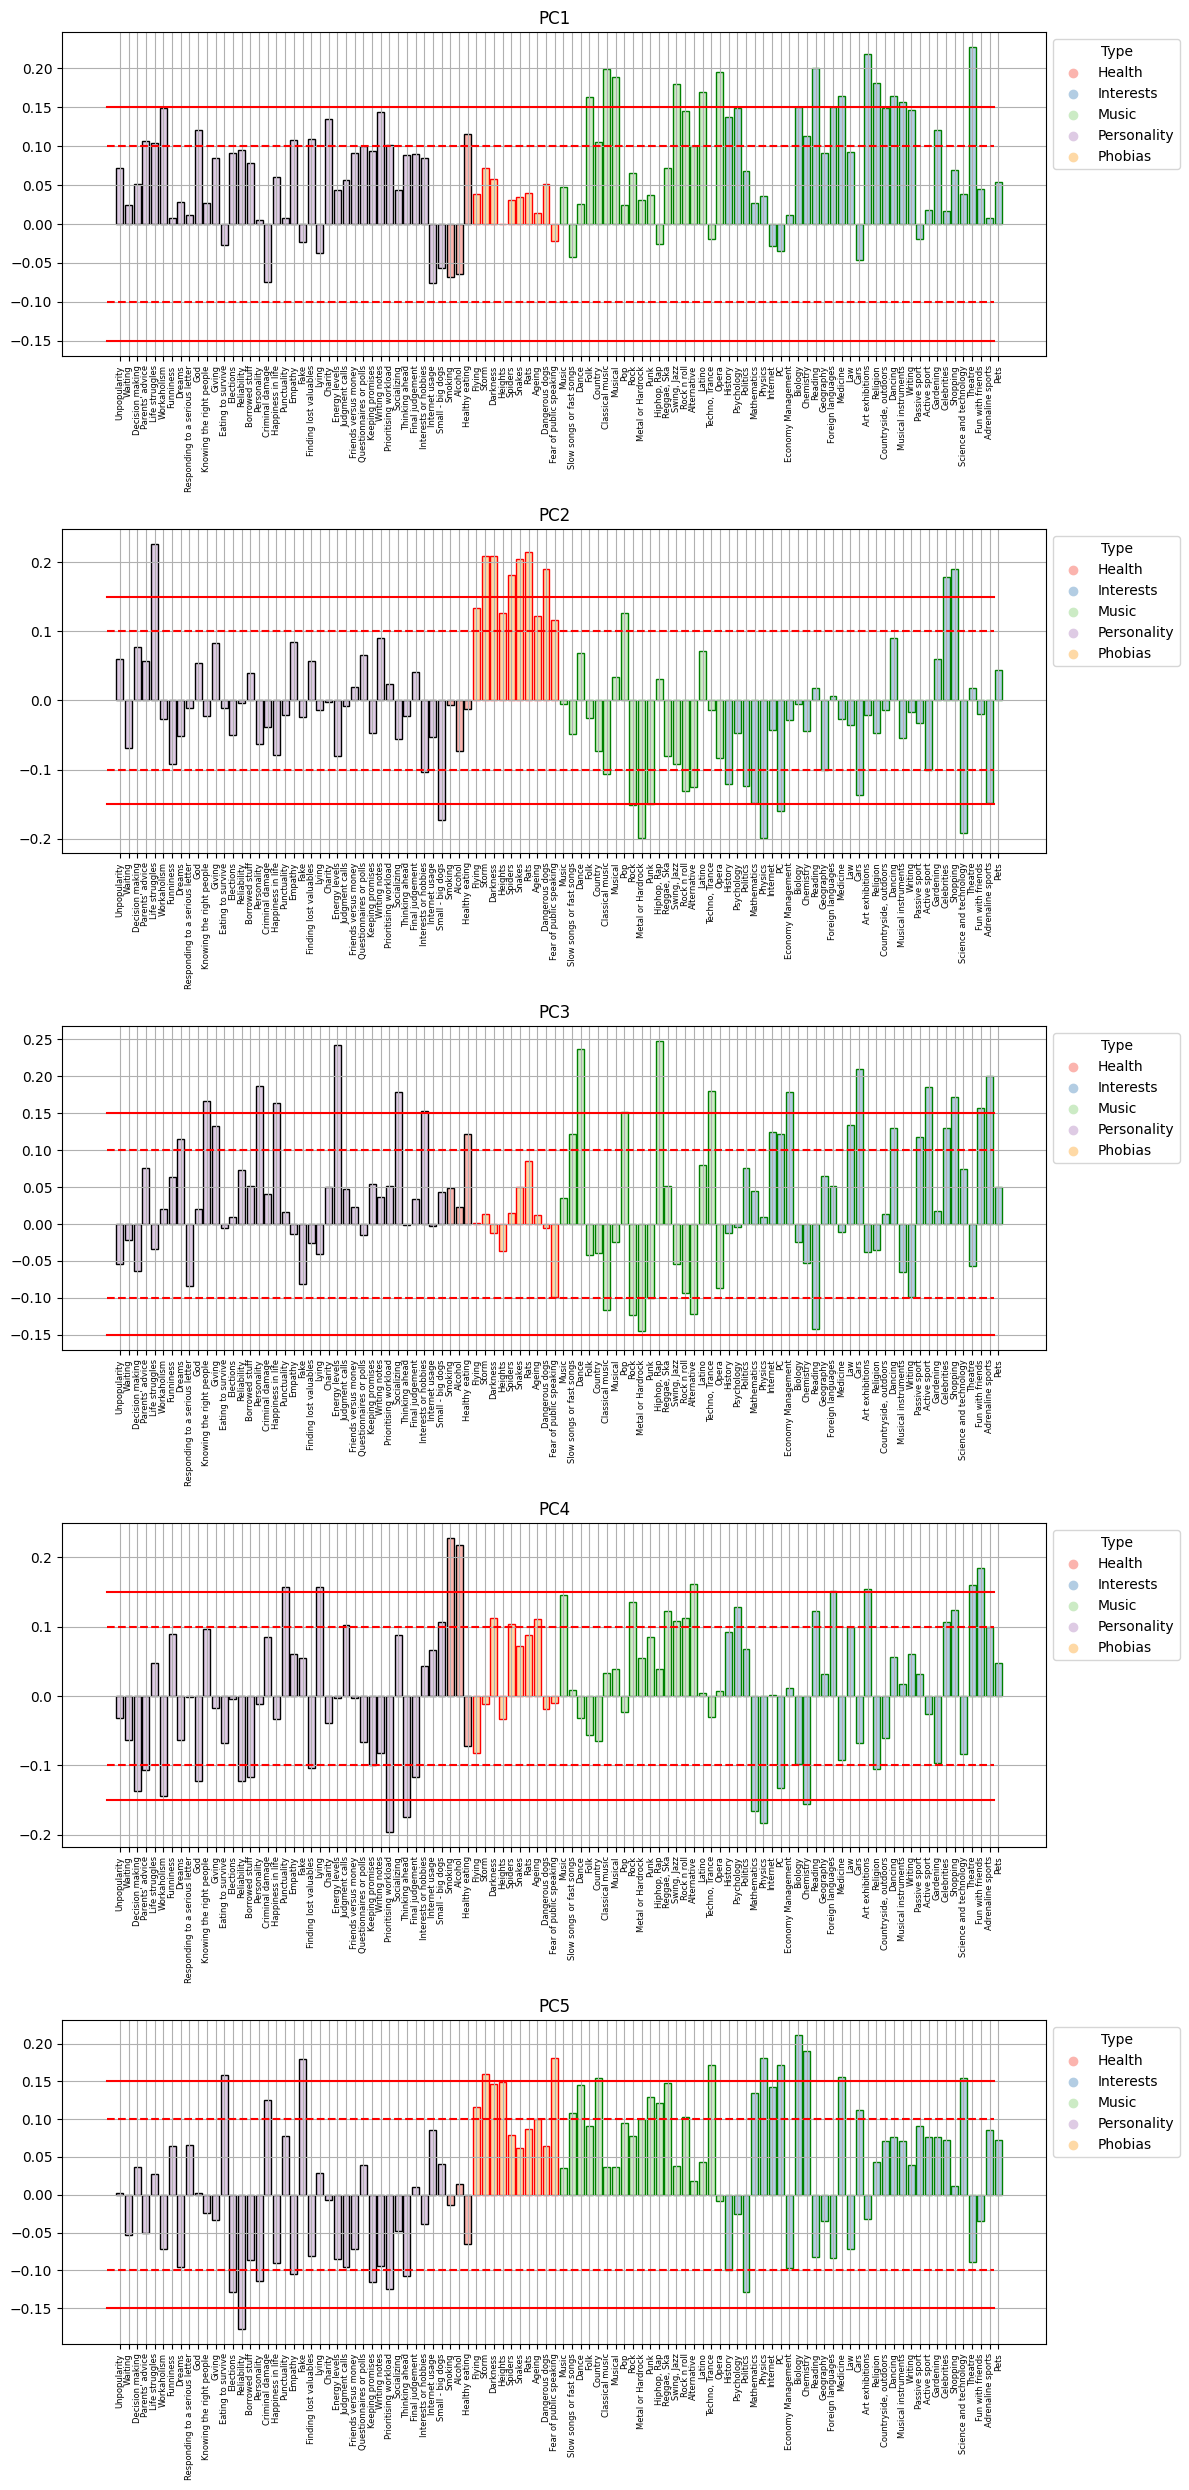

In [32]:
print('Standard scaled data - Features contributions to PCs')

#Visualization of pcs number and explained variance
display(pd.DataFrame({'PC number': pca_std.n_components_, 
                      '% Total explained variance': pca_std.explained_variance_ratio_.sum()}, 
                     index=['Standard scaled data']))


#Features contributions to PCs
plt.figure(figsize=(12, 25))
matplotlib.rc('xtick', labelsize=6)
for i in range(m):
    plt.subplot(5, 1, i+1)
    plt.grid()
    plt.bar(np.arange(1,pca_std.n_features_in_+1), pca_std.components_[i, :], color=selected_features_df.loc[Xstd_df.columns,'Color type'], edgecolor=selected_features_df.loc[Xstd_df.columns,'Color category'])
    # --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [eps1, eps1], 'red')
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [-eps1, -eps1], 'red')
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [eps2, eps2], 'red', linestyle='--')
    plt.plot([-0.5, pca_std.n_features_in_ - 0.5], [-eps2, -eps2], 'red', linestyle='--')
    # ------------------------------------------------------------------
    plt.xticks(ticks=np.arange(1,pca_std.n_features_in_+1), labels=Xstd_df.columns,rotation=90)
    plt.title(f'PC{i + 1}')
    plt.tight_layout()
    for type_name, color in type_color.items():
        plt.scatter([], [], color=color, label=type_name)
    plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('PCA_components',dpi=300)    
plt.show()

In [33]:
for pc in range(m):
    ind_great_pos_PC = np.argwhere(pca_std.components_[pc, :] >= eps1).flatten()
    ind_great_neg_PC = np.argwhere(pca_std.components_[pc, :] <= -eps1).flatten()
    ind_mid_pos_PC = np.argwhere(pca_std.components_[pc, :] >= eps2).flatten()
    ind_mid_neg_PC = np.argwhere(pca_std.components_[pc, :] <= -eps2).flatten()
    
    great_pos_PC = [Xstd_df.columns[i] for i in ind_great_pos_PC]
    great_neg_PC = [Xstd_df.columns[i] for i in ind_great_neg_PC]
    mid_pos_PC = [Xstd_df.columns[i] for i in ind_mid_pos_PC]
    mid_neg_PC = [Xstd_df.columns[i] for i in ind_mid_neg_PC]
    
    print('')
    print(f'****************** PC{pc+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PC}')
    print(f'MID-VALUED POSITIVE COMPONENTS: {mid_pos_PC}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PC}')
    print(f'MID-VALUED NEGATIVE COMPONENTS: {mid_neg_PC}')
    print('*********************************************')
    print('')


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Folk', 'Classical music', 'Musical', 'Swing, Jazz', 'Latino', 'Opera', 'Biology', 'Reading', 'Medicine', 'Art exhibitions', 'Religion', 'Dancing', 'Musical instruments', 'Theatre']
MID-VALUED POSITIVE COMPONENTS: ["Parents' advice", 'Life struggles', 'Workaholism', 'God', 'Empathy', 'Finding lost valuables', 'Charity', 'Writing notes', 'Prioritising workload', 'Healthy eating', 'Folk', 'Country', 'Classical music', 'Musical', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Opera', 'History', 'Psychology', 'Biology', 'Chemistry', 'Reading', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Gardening', 'Theatre']

HIGH-VALUED NEGATIVE COMPONENTS: []
MID-VALUED NEGATIVE COMPONENTS: []
*********************************************


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Life 

We analyse the graphs, one at a time, In the following paragraphs.

#### PC1

Looking at the features contribuing positively and negatively more consistently (over the first threshold), we can identify the following characteristics for the people falling in points with high values of PC1:
- like folk, classical, swing, jazz, latin music, musicals and opera;
- are interested in reading, biology, medicine, art exhibitions, religion, dancing, musical instruments, and theater.

Consiquently, we can say that this group represents the _artistic and cultured_ demographic.

Is we take a look at the full graph, we can notice that the interests have an overall positive influence, as well as music, while phobias give a low contribution.

From the "middle-contribution" features, it emerges that these people:
- are also interested in gardening, writing, outdoor activities, foreign languages, chemistry, psychology and history; 
- often study or work even in spare time, trying to do tasks as soon as possible and making lists for not forget anything;
- believe in God, give to charity, are emphatic and cry when things don't go the right way;
- always listen to their parents, are honest and live a healthy lifestyle.

After this broader overview, including more features about their personalities, we can confirm their "cultured" demographic, but we can also say they are vary disciplined. Their artistic streak goes into the background.

#### PC2
The features of this group of people, which have high values of PC2, are well delineated. From both an overall point of view and from the more contribuing and middle features, it is clear as phobias are a significant factor in their personality. All phobias have a strong positive contribution. Almost no contribution is given by _personality_ and _health_, and mainly negative contribution by music and interests.

Other than phobias, high and middle contribution features include:
- they cry when feel down or things don't go the right way;
- they like shopping and celebrities;
- they like pop music, but not classical, rock, metal, punk, alternative or hardrock music;
- they don't like physics, PCs' softwares and hardwares, science and technology.
- (in the background) they don't like history, politics, mathematics, geography, cars, active sport and adrenaline sports.

To conclude, we can denote this group of people as _sensitive and trendy_.

#### PC3

Samples with high values of PC3 have instead many interests, including:
- Dance, pop, hiphop, rap, techno and trance music
- Economy management, cars, active sport, shopping, have fun with friends, socializing, and adrenaline sports.

They believe all their personality traits are positive, they always make sure to connect with the right people, they are 100% happy with their life and always full of energy.

They don't like reading, nor other types of music such as classical, rock, metal, punk, alternative or hardrock.

We can summarize these personalities as _dynamic social enthusiasts_.

Less importantly, we can associate them with the following characteristics:
- They try to give as much as they can to other people at Christmas;
- They always have good dreams;
- They live a very healthy lifestyle;
- They are interested in internet, PC, law, dancing, passive sport, and celebrities.

These additional information does not add much to our considerations about an appropriate label.


#### PC4
Through the fourth principal component, we identify people who are always late, lie if have the occasion, smoke and drink often, like alternative music, foreign languages, art exhibitions, theatre and having fun with friends.

People of this group procrastinate tasks until the last minute 
and don't look at things from all different angles before going ahead.
They don't like mathematics, physics, and chemistry.

They can be labeled as _alternative free-spirits_.

From an overall view of the graph and from the less contribuiting features, we don't get additonal insights about their personalities.


#### PC5
From the graph of the last considered PC, we can immediately notice how phobias and music have an overall positive influence.
In particular, individuals in this group are scared by storms and public speaking and like country, techno and trance music.

They also like physics, PCs' softwares and hardwares, biology, chemistry, medicine and, more in general, science and technology.

They don't enjoy food, they eat because they have to and eat as fast as they can. Moreover, they can be two faced sometimes and are not reliable at work often not completing all the tasks given.

A good label for this group could be _practical, science and technology lovers_.

On the background we have their interest for mathematics, internet and cars and the fact that they damaged things in the past when angry.

These last features can confirm the label assigned.

To conclude, it is important to clarify that the 5 PCs were referred to as groups of people solely for simplicity in explaining the concepts. Each label corresponds to a distinct axis, meaning that any given sample (individual) may align with these characteristics to varying degrees. Furthermore, a single individual can be associated with multiple groups, with varying levels of intensity.

We summarize the 5 PCs and their labels as follows:

- PC1: Cultured and disciplined
- PC2: Sensitive and trendy
- PC3: Dynamic social enthusiast
- PC4: Alternative free-spirit
- PC5: Practical, science and technology lover

#### Explained Variance Plots

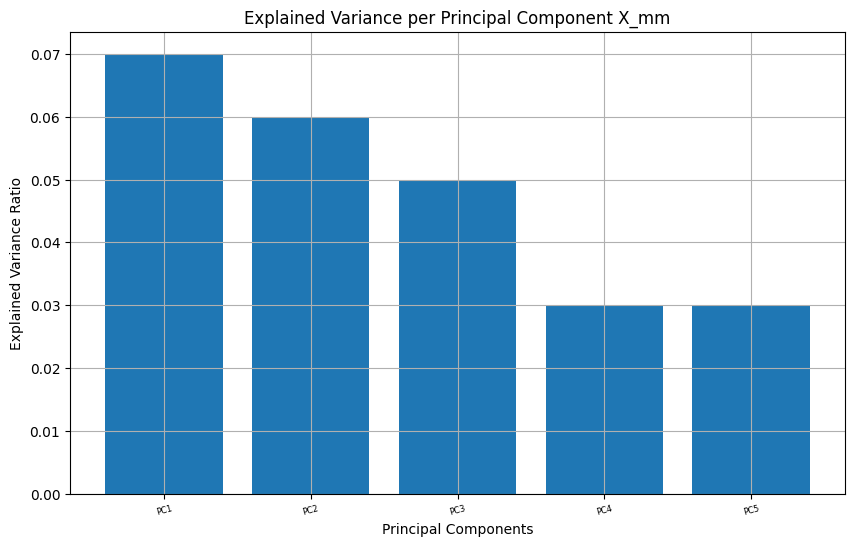

In [34]:

# COMPUTE THE PERCENTAGE OF TOTAL EXPLAINED VARIANCE (ROUNDED TO 2 DECIMALS)
round_expl_var_ratio = np.round(pca_std.fit(Xstd_df.values).explained_variance_ratio_, 2)  # il 2 per arrotondare a due decimali
m=5
# MAKE THE BARPLOT FOR PCA
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(round_expl_var_ratio))[:m], round_expl_var_ratio[:m])  # usa l'indice per il barplot
plt.title('Explained Variance per Principal Component X_mm')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(len(round_expl_var_ratio))[:m], [f'PC{i+1}' for i in range(m)], rotation=15)
plt.grid()
plt.show()

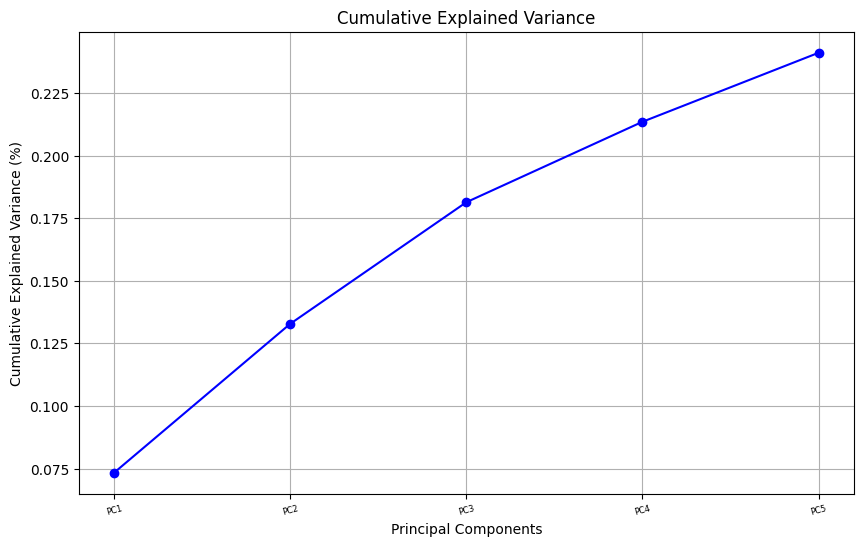

PC1: 7.33%
PC2: 13.28%
PC3: 18.14%
PC4: 21.35%
PC5: 24.10%


In [35]:
# Compute the explained variance for standardized data
explained_variance_ratio = pca_std.fit(Xstd_df.values).explained_variance_ratio_

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks(np.arange(len(explained_variance_ratio)), [f'PC{i+1}' for i in range(len(explained_variance_ratio))], rotation=15)
plt.grid()
plt.show()

# Print the percentage of cumulative explained variance for each component
for i, val in enumerate(cumulative_variance):
    print(f'PC{i+1}: {val*100:.2f}%')



From the first graph, it can be observed that the explained variance of the first principal component is only 7%, followed by 6% for the second, 5% for the third, and 3% for the last two components.
This suggests that no single component dominates the variance, and the variance is fairly evenly distributed across multiple components. 
Additionally, as we already know, since m < m', the explained variance by the first principal components will certainly be less than 33%. Specifically, by looking at the second graph, we can affirm that the explained variance of the first five principal components is 24.10%. This reinforces the idea that a larger number of components would be needed to explain a significant portion of the total variance in the dataset.

### MinMax scaled data PCs visualization

MinMax scaled data - Features contributions to PCs


PC number  % Total explained variance
Standard scaled data          5                    0.260607

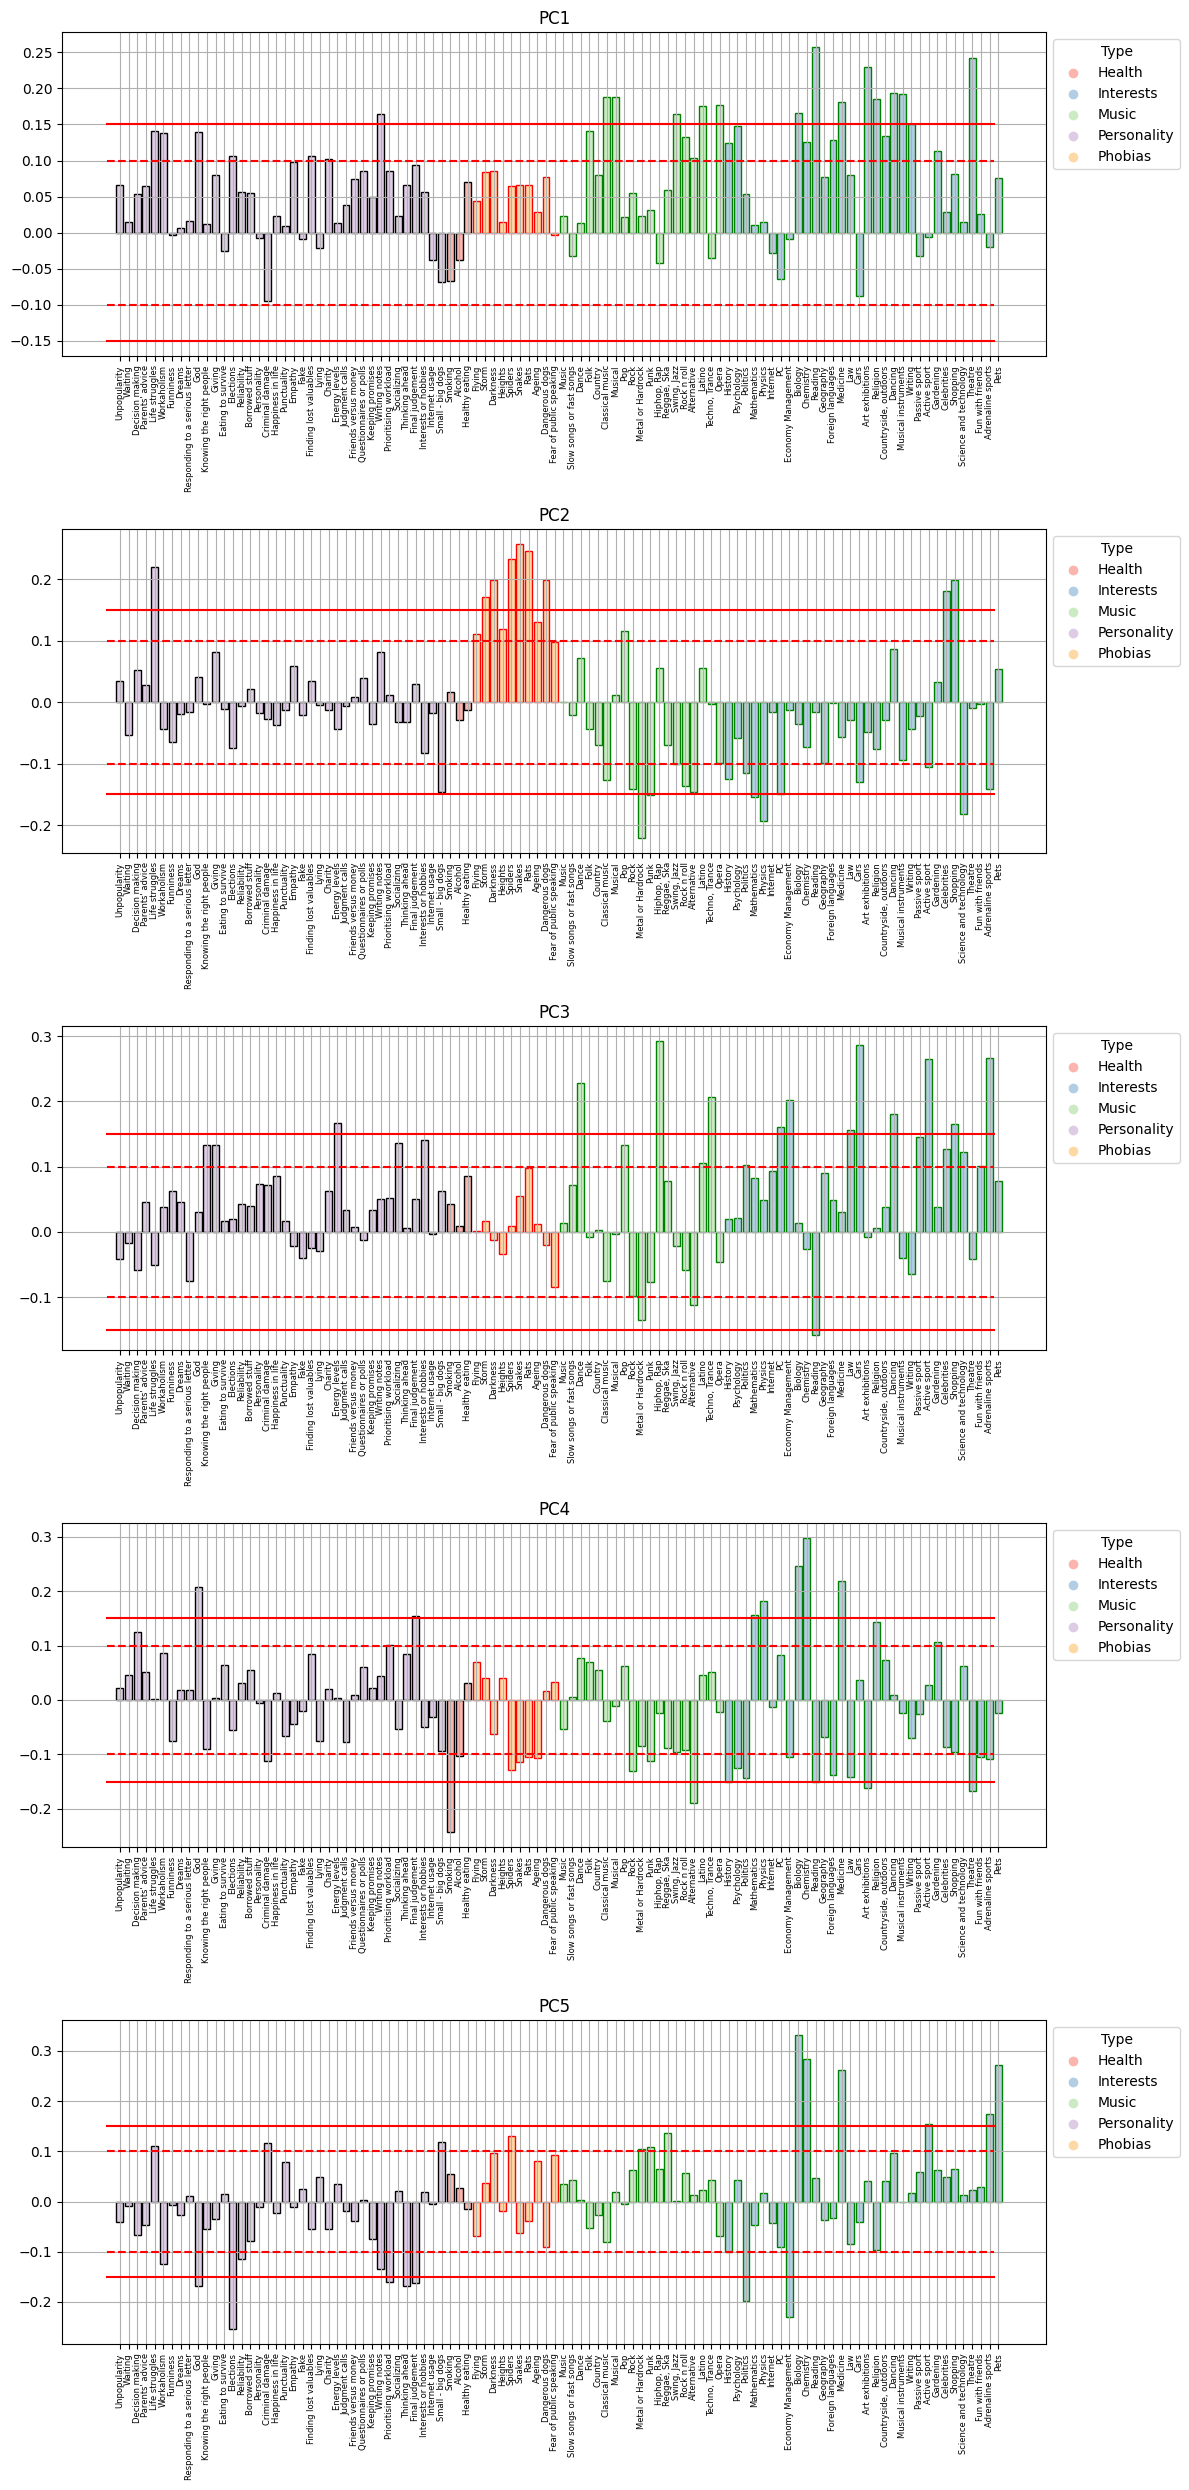

In [36]:
print('MinMax scaled data - Features contributions to PCs')

#Visualization of pcs number and explained variance
display(pd.DataFrame({'PC number': pca_mm.n_components_, 
                      '% Total explained variance': pca_mm.explained_variance_ratio_.sum()}, 
                     index=['Standard scaled data']))


#Features contributions to PCs
plt.figure(figsize=(12, 25))
matplotlib.rc('xtick', labelsize=6)
for i in range(m):
    plt.subplot(5, 1, i+1)
    plt.grid()
    plt.bar(np.arange(1,pca_mm.n_features_in_+1), pca_mm.components_[i, :], color=selected_features_df.loc[Xmm_df.columns,'Color type'], edgecolor=selected_features_df.loc[Xmm_df.columns,'Color category'])
    # --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [eps1, eps1], 'red')
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [-eps1, -eps1], 'red')
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [eps2, eps2], 'red', linestyle='--')
    plt.plot([-0.5, pca_mm.n_features_in_ - 0.5], [-eps2, -eps2], 'red', linestyle='--')
    # ------------------------------------------------------------------
    plt.xticks(ticks=np.arange(1,pca_mm.n_features_in_+1), labels=Xmm_df.columns,rotation=90)
    plt.title(f'PC{i + 1}')
    plt.tight_layout()
    for type_name, color in type_color.items():
        plt.scatter([], [], color=color, label=type_name)
    plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('PCA_components',dpi=300)    
plt.show()

In [37]:
for pc in range(m):
    ind_great_pos_PC = np.argwhere(pca_mm.components_[pc, :] >= eps1).flatten()
    ind_great_neg_PC = np.argwhere(pca_mm.components_[pc, :] <= -eps1).flatten()
    ind_mid_pos_PC = np.argwhere(pca_mm.components_[pc, :] >= eps2).flatten()
    ind_mid_neg_PC = np.argwhere(pca_mm.components_[pc, :] <= -eps2).flatten()
    
    great_pos_PC = [Xmm_df.columns[i] for i in ind_great_pos_PC]
    great_neg_PC = [Xmm_df.columns[i] for i in ind_great_neg_PC]
    mid_pos_PC = [Xmm_df.columns[i] for i in ind_mid_pos_PC]
    mid_neg_PC = [Xmm_df.columns[i] for i in ind_mid_neg_PC]
    
    print('')
    print(f'****************** PC{pc+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PC}')
    print(f'MID-VALUED POSITIVE COMPONENTS: {mid_pos_PC}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PC}')
    print(f'MID-VALUED NEGATIVE COMPONENTS: {mid_neg_PC}')
    print('*********************************************')
    print('')


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Writing notes', 'Classical music', 'Musical', 'Swing, Jazz', 'Latino', 'Opera', 'Biology', 'Reading', 'Medicine', 'Art exhibitions', 'Religion', 'Dancing', 'Musical instruments', 'Writing', 'Theatre']
MID-VALUED POSITIVE COMPONENTS: ['Life struggles', 'Workaholism', 'God', 'Elections', 'Finding lost valuables', 'Charity', 'Writing notes', 'Folk', 'Classical music', 'Musical', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Opera', 'History', 'Psychology', 'Biology', 'Chemistry', 'Reading', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Gardening', 'Theatre']

HIGH-VALUED NEGATIVE COMPONENTS: []
MID-VALUED NEGATIVE COMPONENTS: []
*********************************************


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Life struggles', 'Storm', 'Darkness', 'Spiders', 'Snakes

The labels assigned to the first three PCs for the standard scaled data can be confirmed, although slight differences in the contributing features are noticeable.

PC4 and PC5 have completely different interpretations.

#### PC4
This group of people can be called _logical and moral thinkers_. They are rational, disciplined, and deeply moral. They have a strong belief in God and justice, trusting that good people will be rewarded and bad people will face consequences. They are highly interested in science, including mathematics, physics, biology, chemistry, and medicine. They are also responsible and well-organized, making careful decisions, managing their workload efficiently, and valuing religion and gardening.  

They do not engage in smoking or drinking and are not drawn to alternative music, rock, punk, or adrenaline sports. They have no interest in history, reading, psychology, politics, economy, law, foreign languages, or fun with friends. They also do not struggle with fears like spiders, snakes, rats, or aging. Instead, they focus on logic, structure, and moral values, avoiding destructive behaviors or impulsive actions.

#### PC5
This group of people can be called _energetic and passionate explorers_. They are highly active, adventurous, and deeply interested in biology, chemistry, and medicine. They enjoy both regular and adrenaline sports, embracing excitement and physical challenges. They also have a strong love for pets, valuing their companionship and energy.  

They are emotionally expressive, sometimes crying when things go wrong or reacting strongly in moments of anger. They prefer big, powerful dogs over smaller, calmer ones and have a fear of spiders. Their musical taste leans toward intense and rebellious genres like metal, hard rock, punk, reggae, and ska.  

They do not prioritize religion, politics, or structured planning, rejecting beliefs about divine justice and the importance of elections or economic management. They are not highly focused on workaholism, reliability, or note-taking, and they show little interest in history. Instead, they embrace a spontaneous and emotionally driven lifestyle, thriving on excitement, strong feelings, and personal freedom.

Finding a label for this last PC, was harder compared to the previous ones, since all the features were of different entity.

We summarize the 5 PCs and their labels as follows:

- PC1: Cultured and disciplined
- PC2: Sensitive and trendy
- PC3: Dynamic social enthusiast
- PC4: Logical and moral thinkers
- PC5: Energetic and passionate explorers

#### Explained Variance Plots

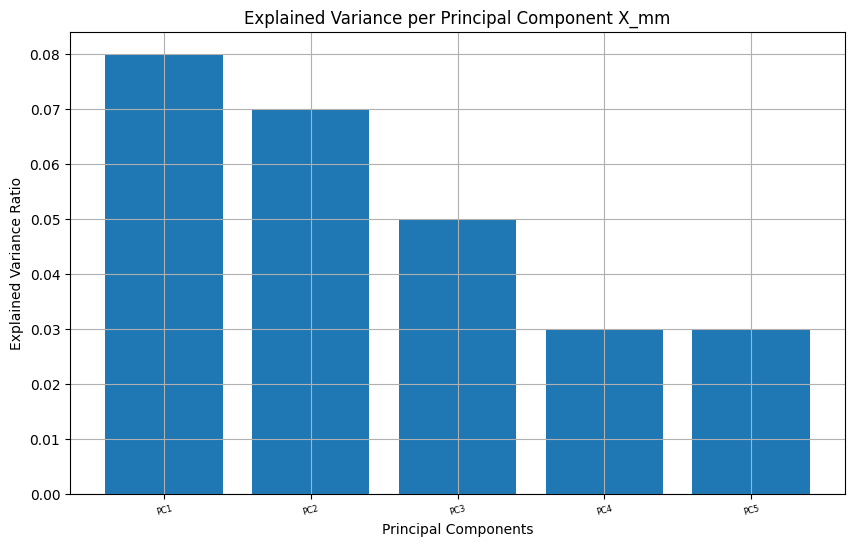

In [38]:

# COMPUTE THE PERCENTAGE OF TOTAL EXPLAINED VARIANCE (ROUNDED TO 2 DECIMALS)
round_expl_var_ratio = np.round(pca_std.fit(Xmm_df.values).explained_variance_ratio_, 2)  # il 2 per arrotondare a due decimali
m=5
# MAKE THE BARPLOT FOR PCA
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(round_expl_var_ratio))[:m], round_expl_var_ratio[:m])  # usa l'indice per il barplot
plt.title('Explained Variance per Principal Component X_mm')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(len(round_expl_var_ratio))[:m], [f'PC{i+1}' for i in range(m)], rotation=15)
plt.grid()
plt.show()

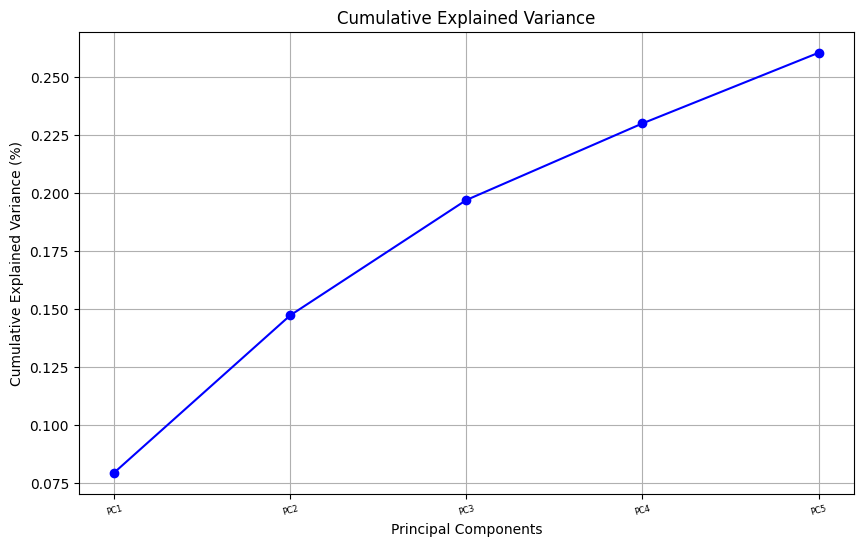

PC1: 7.93%
PC2: 14.73%
PC3: 19.70%
PC4: 23.01%
PC5: 26.06%


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the explained variance for standardized data
explained_variance_ratio = pca_std.fit(Xmm_df.values).explained_variance_ratio_

# Compute cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks(np.arange(len(explained_variance_ratio)), [f'PC{i+1}' for i in range(len(explained_variance_ratio))], rotation=15)
plt.grid()
plt.show()

# Print the percentage of cumulative explained variance for each component
for i, val in enumerate(cumulative_variance):
    print(f'PC{i+1}: {val*100:.2f}%')


When analyzing the principal components of the X_mm dataset, we observe a very similar trend to the Xstd data. The explained variance across the first few components does not change significantly. In particular, the explained variance for the first five components reaches 26%, which is only a slight increase compared to the 24.10% seen in the standard scaled data. This indicates that the Min-Max scaling does not drastically alter the distribution of variance across the components, and the overall pattern remains consistent. Therefore, dimensionality reduction with the first few components would still result in the loss of a substantial amount of variance.

By comparing the plots of each feature's contribution to the PCs, we can see that, overall, the charts for data transformed with the Min-Max Scaler show some very high peaks for certain characteristics, surrounded by very low values for the rest, both in the positive and negative parts of the chart. In contrast, the charts for data that were standard scaled show columns with more evenly distributed lengths, although there are still some fluctuations.

### Score graphs

We now show the score graphs for the first 2 and first 3 PCs and for both datasets. We want to compare the results in terms of the demographical information listed below.

In [40]:
display(labels)

['Age',
 'Height',
 'Weight',
 'Number of siblings',
 'Gender',
 'Hand',
 'Education',
 'Only child',
 'Home Town Type',
 'Home Type']

Here we convert categorical target features to numerical, taking into account the order of the values (for example in the educational level).

In [41]:
numeric_X = X_df_load.copy()
numeric_X['Gender'] = X_df_load['Gender'].apply(lambda x: 1 if x == 'male' else 0)
numeric_X['Education'] = X_df_load['Education'].apply(lambda x: 0 if x == 'currently a primary school pupil' else x)
numeric_X['Education'] = numeric_X['Education'].apply(lambda x: 1 if x == 'primary school' else x)
numeric_X['Education'] = numeric_X['Education'].apply(lambda x: 2 if x == 'secondary school' else x)
numeric_X['Education'] = numeric_X['Education'].apply(lambda x: 3 if x == 'college/bachelor degree' else x)
numeric_X['Education'] = numeric_X['Education'].apply(lambda x: 4 if x == 'masters degree' else x)
numeric_X['Education'] = numeric_X['Education'].apply(lambda x: 5 if x == 'doctorate degree' else x)
numeric_X['Home Town Type'] = X_df_load['Home Town Type'].apply(lambda x: 1 if x == 'city' else 0)
numeric_X['Home Type'] = X_df_load['Home Type'].apply(lambda x: 1 if x == 'house/bungalow' else 0)

#### Education level and gender comparisons

C:\Users\ghiot\AppData\Local\Temp\ipykernel_34088\1576728623.py:21: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 6
  plt.legend(handles=scatter1.legend_elements()[0], labels=['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree'], loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, ncol=3)


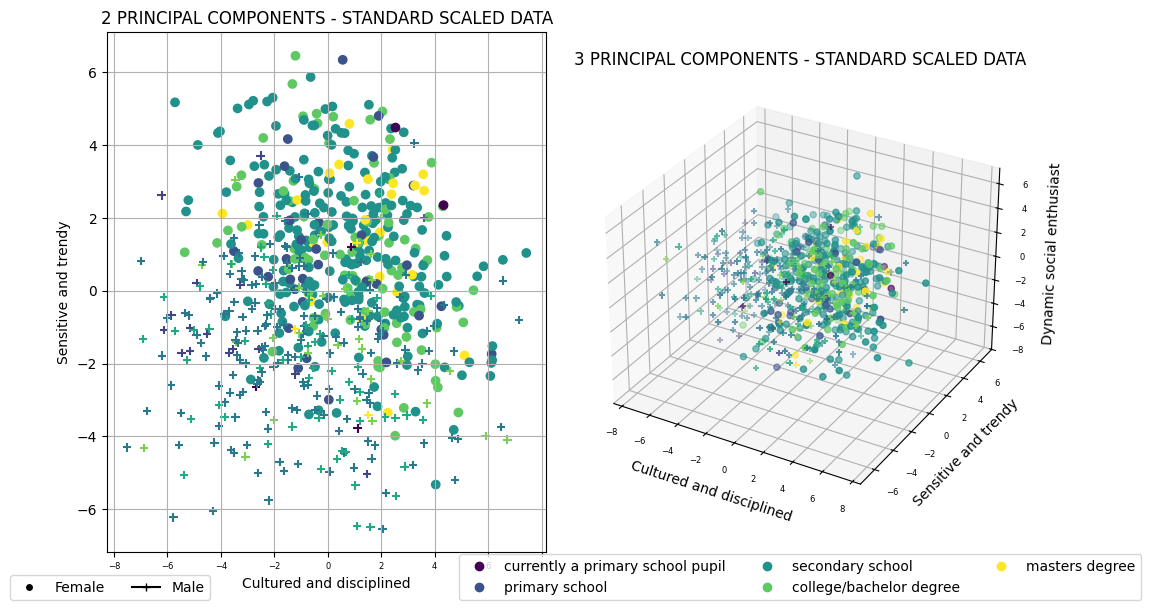

In [42]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
scatter = ax1.scatter(pca_Xstd_m[:,0][numeric_X['Gender']==0], pca_Xstd_m[:,1][numeric_X['Gender']==0], c=numeric_X.loc[numeric_X['Gender']==0,'Education'], marker='o')
scatter = ax1.scatter(pca_Xstd_m[:,0][numeric_X['Gender']==1], pca_Xstd_m[:,1][numeric_X['Gender']==1], c=numeric_X.loc[numeric_X['Gender']==1,'Education'], marker='+')
plt.title('2 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')
legend_elements = [Line2D([0], [0], marker='o', label='Female',color='w', markerfacecolor='black'), Line2D([0], [0], marker='+', label='Male',color='black')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.25, -0.03), fancybox=True, ncol=2)

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
scatter1 = ax2.scatter(pca_Xstd_m[:,0][numeric_X['Gender']==0], pca_Xstd_m[:,1][numeric_X['Gender']==0], pca_Xstd_m[:,2][numeric_X['Gender']==0], c=numeric_X.loc[numeric_X['Gender']==0,'Education'], marker='o')
scatter2 = ax2.scatter(pca_Xstd_m[:,0][numeric_X['Gender']==1], pca_Xstd_m[:,1][numeric_X['Gender']==1], pca_Xstd_m[:,2][numeric_X['Gender']==1], c=numeric_X.loc[numeric_X['Gender']==1,'Education'], marker='+')
plt.title('3 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast')#, labelpad=-30)
plt.grid()
plt.legend(handles=scatter1.legend_elements()[0], labels=['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree'], loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, ncol=3)
#plt.savefig('PCA_vis',dpi=300)
plt.show()


Looking at the graph on the left, it is noticeable that male samples are primarily distributed in the lower-left part, while female samples are concentrated in the upper-right part of the graph. Since the origin is approximately at the center of the graph, this suggests that females exhibit the two qualities described by the axes more strongly. Males, on the other hand, tend to show less of these qualities and lean toward opposing traits. 

This means that males seem to be less _cultured and disciplined_ compared to females, who also appear to be, on average, more _sensitive and trendy_. However, this trend is minimal, and it would be risky to make strong assumptions or generalize based on these observations.

Also, these observations seem to be influenced by a bias. In fact, most of the people who completed a master’s degree are female, and the female samples seem to have a slightly higher education level overall compared to the male samples. As for the _dynamic social enthusiast_ axis, no particular trends are noticeable.

C:\Users\ghiot\AppData\Local\Temp\ipykernel_34088\3493128730.py:21: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 6
  plt.legend(handles=scatter1.legend_elements()[0], labels=['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree'], loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, ncol=3)


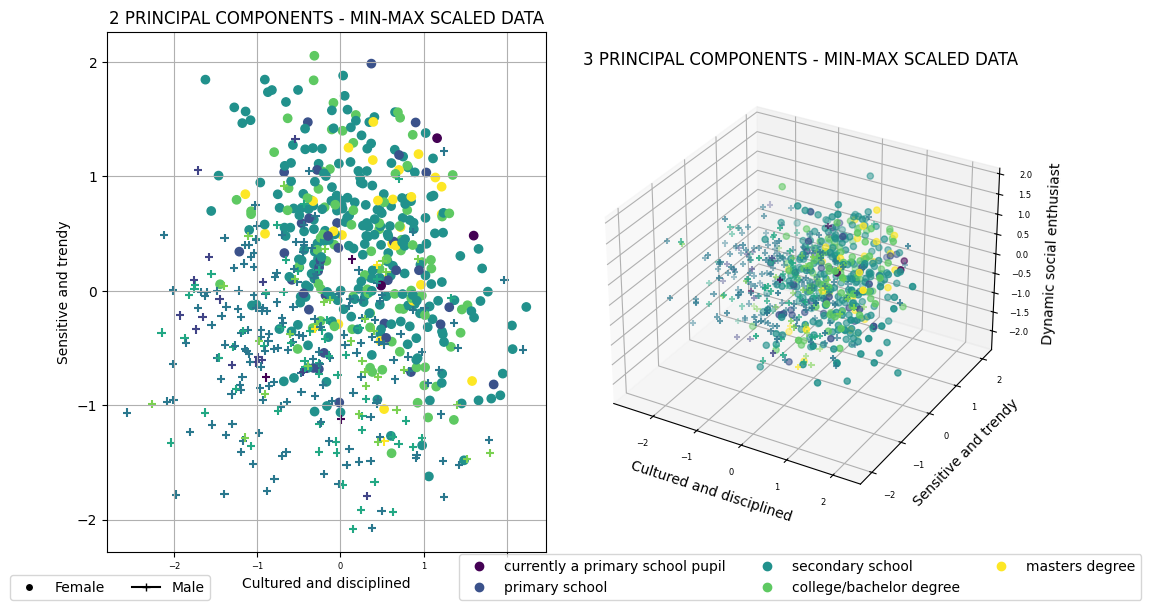

In [43]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
scatter = ax1.scatter(pca_Xmm_m[:,0][numeric_X['Gender']==0], pca_Xmm_m[:,1][numeric_X['Gender']==0], c=numeric_X.loc[numeric_X['Gender']==0,'Education'], marker='o')
scatter = ax1.scatter(pca_Xmm_m[:,0][numeric_X['Gender']==1], pca_Xmm_m[:,1][numeric_X['Gender']==1], c=numeric_X.loc[numeric_X['Gender']==1,'Education'], marker='+')
plt.title('2 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')
legend_elements = [Line2D([0], [0], marker='o', label='Female',color='w', markerfacecolor='black'), Line2D([0], [0], marker='+', label='Male',color='black')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.25, -0.03), fancybox=True, ncol=2)

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
scatter1 = ax2.scatter(pca_Xmm_m[:,0][numeric_X['Gender']==0], pca_Xmm_m[:,1][numeric_X['Gender']==0], pca_Xmm_m[:,2][numeric_X['Gender']==0], c=numeric_X.loc[numeric_X['Gender']==0,'Education'], marker='o')
scatter2 = ax2.scatter(pca_Xmm_m[:,0][numeric_X['Gender']==1], pca_Xmm_m[:,1][numeric_X['Gender']==1], pca_Xmm_m[:,2][numeric_X['Gender']==1], c=numeric_X.loc[numeric_X['Gender']==1,'Education'], marker='+')
plt.title('3 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast')#, labelpad=-30)
plt.grid()
plt.legend(handles=scatter1.legend_elements()[0], labels=['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree'], loc='upper center', bbox_to_anchor=(0.5, -0.08), fancybox=True, ncol=3)
#plt.savefig('PCA_vis',dpi=300)
plt.show()


Same osservations might be done on these plots. The division between males and females seems to be a bit more net and the overall distribution of samples is less globular-shaped.

#### House type and home town Type comparisons

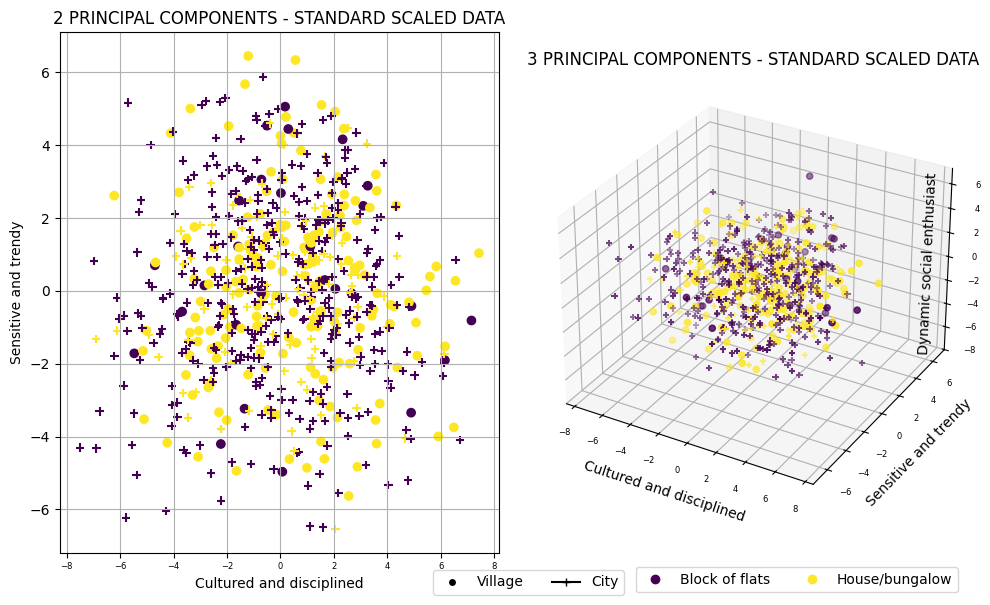

In [44]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
scatter = ax1.scatter(pca_Xstd_m[:,0][numeric_X['Home Town Type']==0], pca_Xstd_m[:,1][numeric_X['Home Town Type']==0], c=numeric_X.loc[numeric_X['Home Town Type']==0,'Home Type'], marker='o')
scatter = ax1.scatter(pca_Xstd_m[:,0][numeric_X['Home Town Type']==1], pca_Xstd_m[:,1][numeric_X['Home Town Type']==1], c=numeric_X.loc[numeric_X['Home Town Type']==1,'Home Type'], marker='+')
plt.title('2 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')
legend_elements = [Line2D([0], [0], marker='o', label='Village',color='w', markerfacecolor='black'), Line2D([0], [0], marker='+', label='City',color='black')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, -0.02), fancybox=True, ncol=2)

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
scatter1 = ax2.scatter(pca_Xstd_m[:,0][numeric_X['Home Town Type']==0], pca_Xstd_m[:,1][numeric_X['Home Town Type']==0], pca_Xstd_m[:,2][numeric_X['Home Town Type']==0], c=numeric_X.loc[numeric_X['Home Town Type']==0,'Home Type'], marker='o')
scatter2 = ax2.scatter(pca_Xstd_m[:,0][numeric_X['Home Town Type']==1], pca_Xstd_m[:,1][numeric_X['Home Town Type']==1], pca_Xstd_m[:,2][numeric_X['Home Town Type']==1], c=numeric_X.loc[numeric_X['Home Town Type']==1,'Home Type'], marker='+')
plt.title('3 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast', labelpad=-30)
plt.grid()
plt.legend(handles=scatter1.legend_elements()[0], labels=['Block of flats','House/bungalow'], loc='upper center', bbox_to_anchor=(0.6, -0.11), fancybox=True, ncol=3)
#plt.savefig('PCA_vis',dpi=300)
plt.show()


In these graphs, as well as in the graphs below, representing min-max scaled data, no relation can ce observed between the plotted classes and the PCs. A strong correlation is instead present between the home town type and the home type. This has trivial explenation, since cities mainly host people in block or flats, while houses or bungalows are more commonly found in villages.

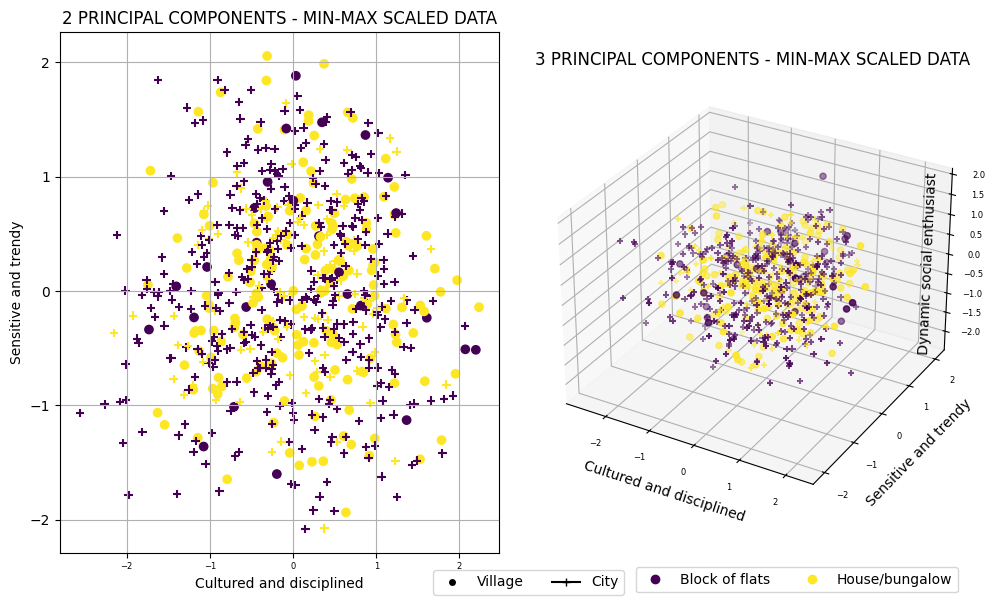

In [45]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
scatter = ax1.scatter(pca_Xmm_m[:,0][numeric_X['Home Town Type']==0], pca_Xmm_m[:,1][numeric_X['Home Town Type']==0], c=numeric_X.loc[numeric_X['Home Town Type']==0,'Home Type'], marker='o')
scatter = ax1.scatter(pca_Xmm_m[:,0][numeric_X['Home Town Type']==1], pca_Xmm_m[:,1][numeric_X['Home Town Type']==1], c=numeric_X.loc[numeric_X['Home Town Type']==1,'Home Type'], marker='+')
plt.title('2 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')
legend_elements = [Line2D([0], [0], marker='o', label='Village',color='w', markerfacecolor='black'), Line2D([0], [0], marker='+', label='City',color='black')]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, -0.02), fancybox=True, ncol=2)
plt.grid()

ax2 = fig.add_subplot(122, projection='3d')
scatter1 = ax2.scatter(pca_Xmm_m[:,0][numeric_X['Home Town Type']==0], pca_Xmm_m[:,1][numeric_X['Home Town Type']==0], pca_Xmm_m[:,2][numeric_X['Home Town Type']==0], c=numeric_X.loc[numeric_X['Home Town Type']==0,'Home Type'], marker='o')
scatter2 = ax2.scatter(pca_Xmm_m[:,0][numeric_X['Home Town Type']==1], pca_Xmm_m[:,1][numeric_X['Home Town Type']==1], pca_Xmm_m[:,2][numeric_X['Home Town Type']==1], c=numeric_X.loc[numeric_X['Home Town Type']==1,'Home Type'], marker='+')
plt.title('3 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast', labelpad=-30)
plt.grid()
plt.legend(handles=scatter1.legend_elements()[0], labels=['Block of flats','House/bungalow'], loc='upper center', bbox_to_anchor=(0.6, -0.11), fancybox=True, ncol=3)
#plt.savefig('PCA_vis',dpi=300)
plt.show()


#### Number of siblings comparison

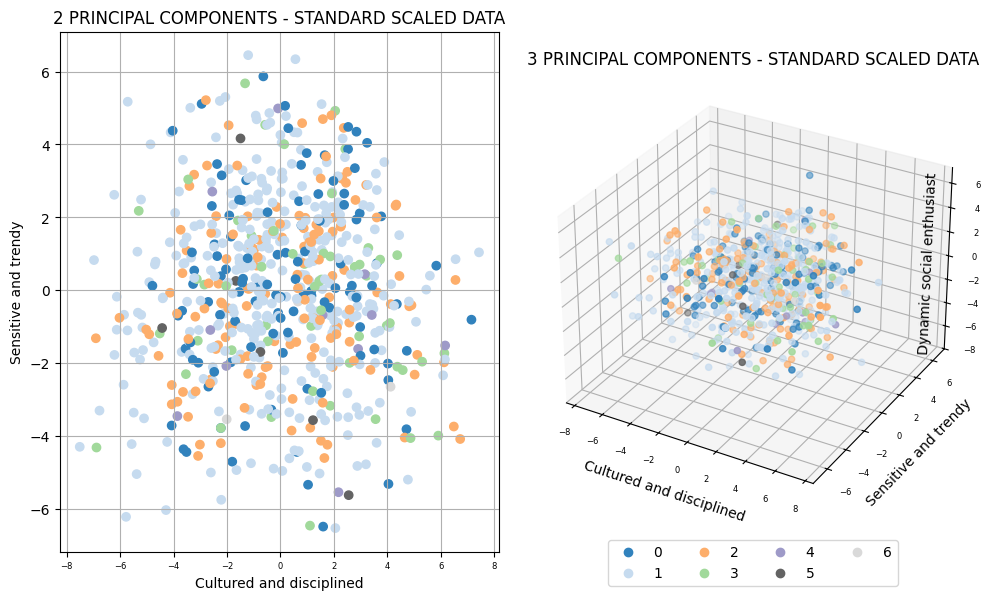

In [46]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
scatter = ax1.scatter(pca_Xstd_m[:,0], pca_Xstd_m[:,1], c=numeric_X['Number of siblings'], cmap='tab20c')
plt.title('2 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(pca_Xstd_m[:,0], pca_Xstd_m[:,1], pca_Xstd_m[:,2], c=numeric_X['Number of siblings'], cmap='tab20c')
plt.title('3 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast', labelpad=-30)
plt.grid()
plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)
#plt.savefig('PCA_vis',dpi=300)
plt.show()

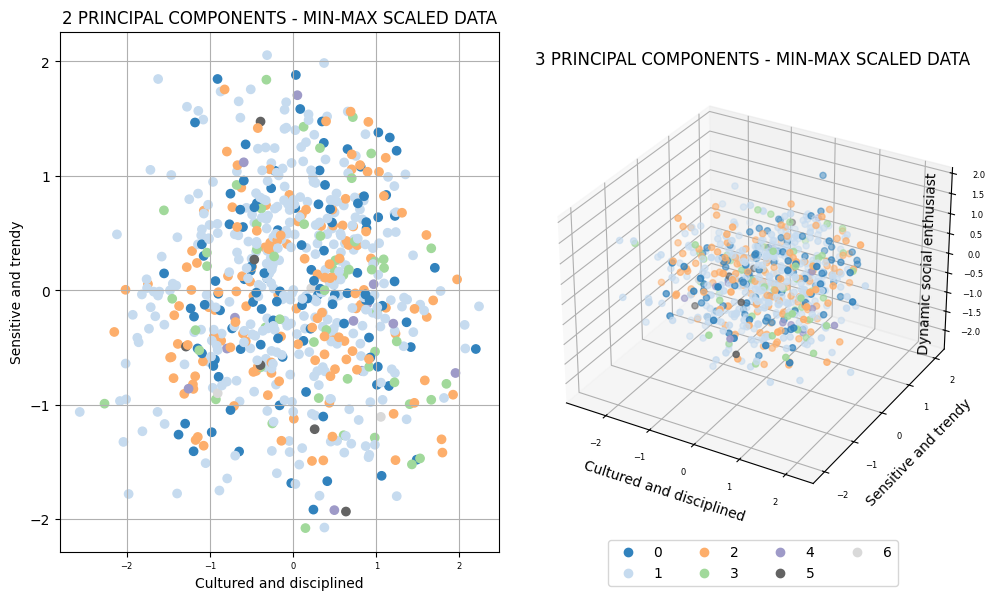

In [47]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
scatter = ax1.scatter(pca_Xmm_m[:,0], pca_Xmm_m[:,1], c=numeric_X['Number of siblings'], cmap='tab20c')
plt.title('2 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(pca_Xmm_m[:,0], pca_Xmm_m[:,1], pca_Xmm_m[:,2], c=numeric_X['Number of siblings'], cmap='tab20c')
plt.title('3 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast', labelpad=-30)
plt.grid()
plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)
#plt.savefig('PCA_vis',dpi=300)
plt.show()

No correlation is again visible between the PCs and the number of samples' siblings.

However, what can be obseved, across all these graphs, is the scale on the axes, which is reduced for min-max scaled data, compared to standard scaled data. This is because the min-max scaler forces the data to fit in a certen interval, so even ones projected to a new space, they will lie in a precise range. The standardized data, are not limited from such a constraint.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

In [48]:
# Lists to store temporary results
km_list = {'km_std':[], 'km_mm':[]}
silcoeff_list = {'coeff_std':[], 'coeff_mm':[]}
k_list = list(range(3, 11))

# Run the k-means and measure the Silhouette coeffifient
for i in range(len(k_list)):
    km_list['km_std'].append(KMeans(n_clusters=k_list[i], random_state=random_seed).fit(pca_Xstd_m))
    km_list['km_mm'].append(KMeans(n_clusters=k_list[i], random_state=random_seed).fit(pca_Xmm_m))
    km_std,km_mm = km_list['km_std'][i], km_list['km_mm'][i]
    silcoeff_list['coeff_std'].append(silhouette_score(pca_Xstd_m, km_std.labels_))
    silcoeff_list['coeff_mm'].append(silhouette_score(pca_Xmm_m, km_mm.labels_))

# Find the best value of k and the best KMeans object
i_best_std, i_best_mm = np.argmax(silcoeff_list['coeff_std']), np.argmax(silcoeff_list['coeff_mm'])
k_best_std, k_best_mm = k_list[i_best_std], k_list[i_best_mm]
km_best_std, km_best_mm = km_list['km_std'][i_best_std], km_list['km_mm'][i_best_mm]

# Visualize the results
print('Results')
print(f'BEST SILHOUETTE SCORE FOR STANDARD SCALED DATA: {np.max(silcoeff_list['coeff_std'])} --> k = {k_best_std}')
print(f'BEST SILHOUETTE SCORE FOR MIN-MAX SCALED DATA: {np.max(silcoeff_list['coeff_mm'])} --> k = {k_best_mm}')

c:\Users\ghiot\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ghiot\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Results
BEST SILHOUETTE SCORE FOR STANDARD SCALED DATA: 0.1809844956895929 --> k = 3
BEST SILHOUETTE SCORE FOR MIN-MAX SCALED DATA: 0.18645345827502607 --> k = 3


After identifying the best number of clusters through the silhouette score, we plot the clusters found in 2 and 3 dimensions. However, the clusters have been computed based on data in 5 dimensions. Reducing the dimensionality of visualization purpose, can lead to lost in information.

In [49]:
colors = ['blue', 'green', 'purple', 'cyan','pink', 'red', 'orange', 'yellow', 'brown', 'gray']
markers = ['o','+', '*', '^','.', 'v', '<', '>', 'd', '1', '2', '3', '4', '8', 'P', 'H', 'D']

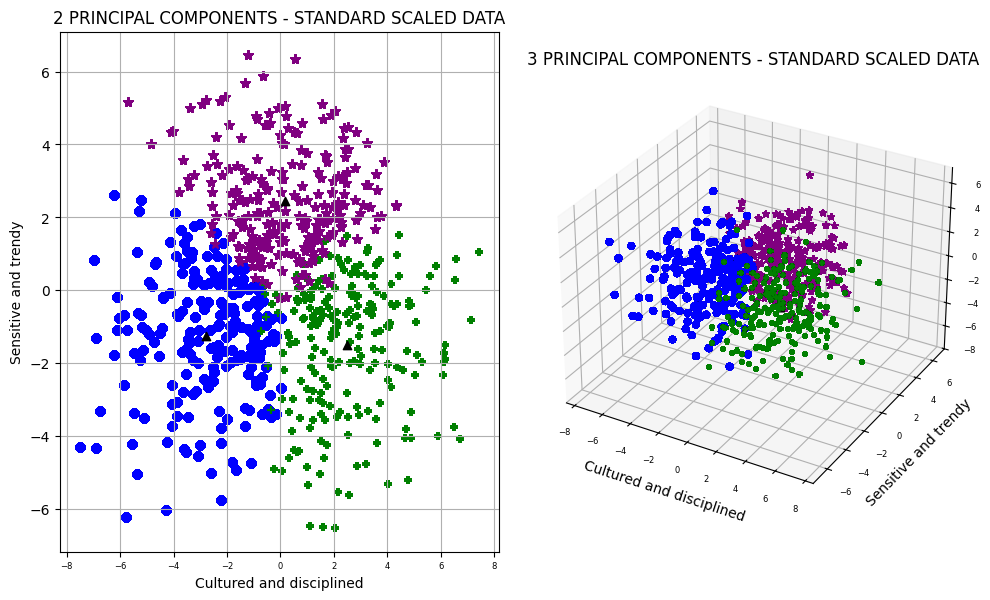

In [50]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
for clus in km_best_std.labels_:
    plt.scatter(pca_Xstd_m[km_best_std.labels_ == clus, 0], pca_Xstd_m[km_best_std.labels_ == clus, 1], c=colors[clus], marker=markers[clus])
plt.scatter(km_best_std.cluster_centers_[:, 0], km_best_std.cluster_centers_[:, 1], c='black', marker='^')
plt.title('2 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
for clus in km_best_std.labels_:
    ax2.scatter(pca_Xstd_m[km_best_std.labels_ == clus, 0], pca_Xstd_m[km_best_std.labels_ == clus, 1], pca_Xstd_m[km_best_std.labels_ == clus, 2], c=colors[clus], marker=markers[clus])
ax2.scatter(km_best_std.cluster_centers_[:, 0], km_best_std.cluster_centers_[:, 1], km_best_std.cluster_centers_[:, 2], c='black', marker='^')
plt.title('3 PRINCIPAL COMPONENTS - STANDARD SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast')#, labelpad=-30)
plt.grid()
#plt.savefig('PCA_vis',dpi=300)
plt.show()

Even when looking at the clusters in 2D, we can see that they are well distinguishable. This suggests that the first two principal components played an important role in defining the groups. The 3D plot doesn't provide much additional information about the clusters' positions, as they don't seem to vary much along the z-axis.

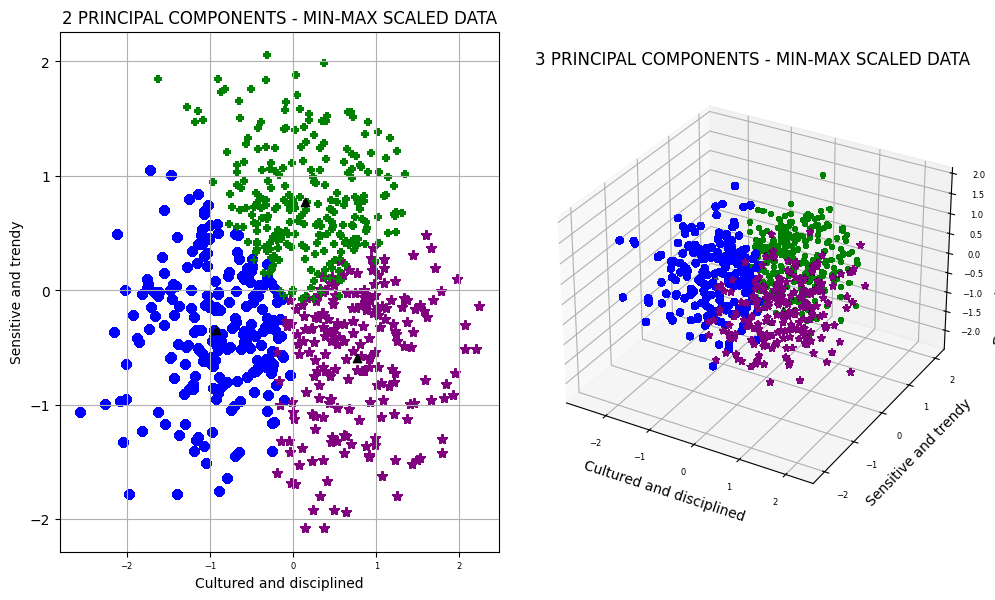

In [51]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
fig.tight_layout(pad=2)
for clus in km_best_mm.labels_:
    plt.scatter(pca_Xmm_m[km_best_mm.labels_ == clus, 0], pca_Xmm_m[km_best_mm.labels_ == clus, 1], c=colors[clus], marker=markers[clus])
plt.scatter(km_best_mm.cluster_centers_[:, 0], km_best_mm.cluster_centers_[:, 1], c='black', marker='^')
plt.title('2 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
plt.xlabel('Cultured and disciplined')
plt.ylabel('Sensitive and trendy')

plt.grid()
ax2 = fig.add_subplot(122, projection='3d')
for clus in km_best_mm.labels_:
    ax2.scatter(pca_Xmm_m[km_best_mm.labels_ == clus, 0], pca_Xmm_m[km_best_mm.labels_ == clus, 1], pca_Xmm_m[km_best_mm.labels_ == clus, 2], c=colors[clus], marker=markers[clus])
ax2.scatter(km_best_mm.cluster_centers_[:, 0], km_best_mm.cluster_centers_[:, 1], km_best_mm.cluster_centers_[:, 2], c='black', marker='^')
plt.title('3 PRINCIPAL COMPONENTS - MIN-MAX SCALED DATA')
ax2.set_xlabel('Cultured and disciplined')
ax2.set_ylabel('Sensitive and trendy')
ax2.set_zlabel('Dynamic social enthusiast')#, labelpad=-30)
plt.grid()
#plt.savefig('PCA_vis',dpi=300)
plt.show()

The same observations rised for the standard scaled data are confirmed in the case of min-max scaled data.

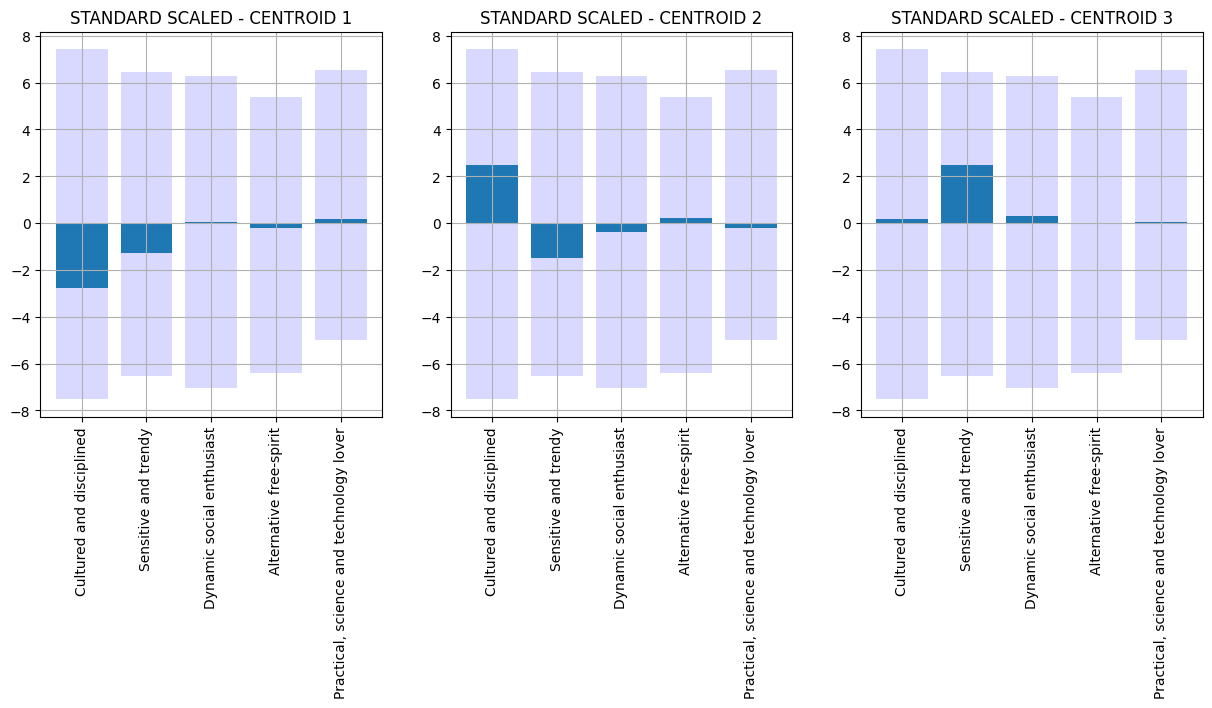

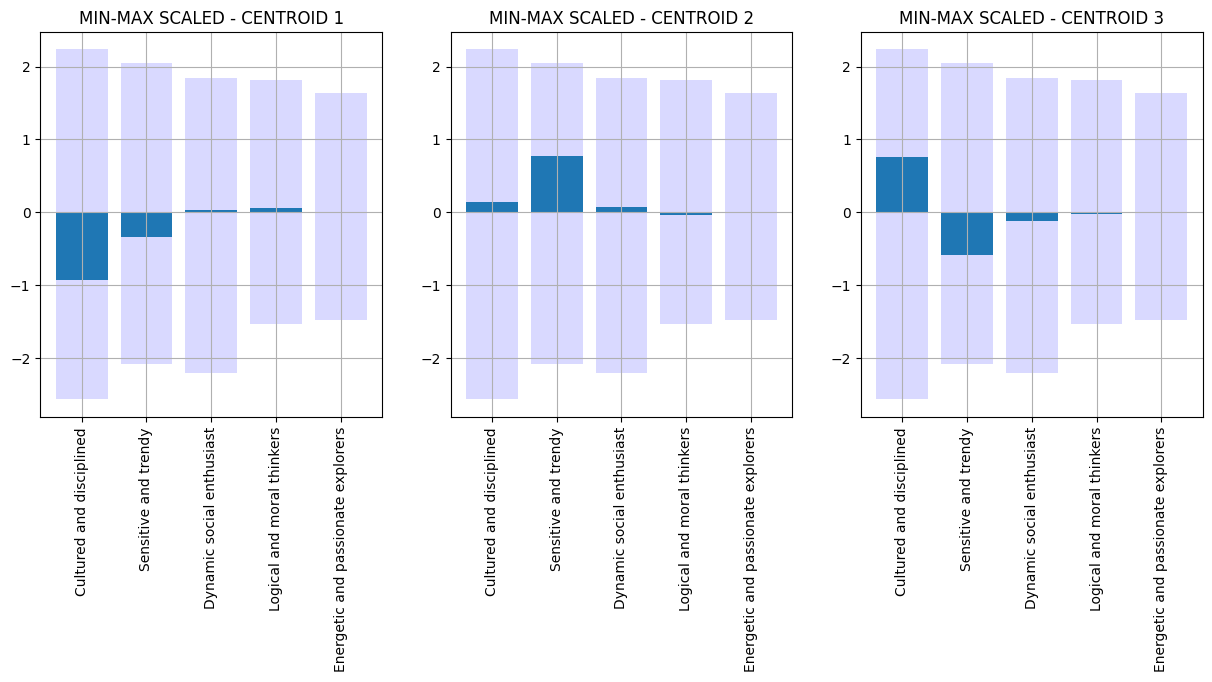

In [52]:
maxs_X_std_m = pca_Xstd_m.max(axis=0) 
mins_X_std_m = pca_Xstd_m.min(axis=0) 

maxs_Xmm_m = pca_Xmm_m.max(axis=0) 
mins_Xmm_m = pca_Xmm_m.min(axis=0) 

X_std_PC1 = "Cultured and disciplined"
X_std_PC2 = "Sensitive and trendy"
X_std_PC3= "Dynamic social enthusiast"
X_std_PC4= "Alternative free-spirit"
X_std_PC5= "Practical, science and technology lover"


X_mm_PC1 = "Cultured and disciplined"
X_mm_PC2 = "Sensitive and trendy"
X_mm_PC3= "Dynamic social enthusiast"
X_mm_PC4= "Logical and moral thinkers"
X_mm_PC5= "Energetic and passionate explorers"

fig_X_std, ax_X_std = plt.subplots(1, 3, figsize=(15, 5))
for ii in range(3):
    ax_X_std[ii].bar(np.arange(km_best_std.cluster_centers_.shape[1]), maxs_X_std_m, color='blue', alpha=0.15)
    ax_X_std[ii].bar(np.arange(km_best_std.cluster_centers_.shape[1]), mins_X_std_m, color='blue', alpha=0.15)
    ax_X_std[ii].bar(np.arange(km_best_std.cluster_centers_.shape[1]), km_best_std.cluster_centers_[ii, :])
    ax_X_std[ii].set_xticks(ticks=np.arange(km_best_std.cluster_centers_.shape[1]))
    ax_X_std[ii].set_xticklabels(labels=[X_std_PC1, X_std_PC2, X_std_PC3,X_std_PC4,X_std_PC5], rotation=90, fontsize=10)
    ax_X_std[ii].grid(visible=True, which='both')
    ax_X_std[ii].set_title(f'STANDARD SCALED - CENTROID {ii+1}')


fig_X_mm, ax_X_mm = plt.subplots(1, 3, figsize=(15, 5))
for ii in range(3):
    ax_X_mm[ii].bar(np.arange(km_best_mm.cluster_centers_.shape[1]), maxs_Xmm_m, color='blue', alpha=0.15)
    ax_X_mm[ii].bar(np.arange(km_best_mm.cluster_centers_.shape[1]), mins_Xmm_m, color='blue', alpha=0.15)
    ax_X_mm[ii].bar(np.arange(km_best_mm.cluster_centers_.shape[1]), km_best_mm.cluster_centers_[ii, :])
    ax_X_mm[ii].set_xticks(ticks=np.arange(km_best_mm.cluster_centers_.shape[1]))
    ax_X_mm[ii].set_xticklabels(labels=[X_mm_PC1, X_mm_PC2, X_mm_PC3,X_mm_PC4,X_mm_PC5], rotation=90, fontsize=10)
    ax_X_mm[ii].grid(visible=True, which='both')
    ax_X_mm[ii].set_title(f'MIN-MAX SCALED - CENTROID {ii+1}')

The above graphs strengthen the hypothesis made by looking at the previous graphs. The coordinates of centroids with respect to the third, fourth and fifth PCs are closed to zero. Only the first two PCs meaningfully contributed to the clusters. However, even along those axes, the centroids have similar coordinates between each other, meaning that the clusters are not well divided.

All the centroids have similar coordinates for both the standard and min-max scaled datasets. They have just been found in a different order in the two cases.

The first centroid for both is moved towards less _cultured and disciplined_ and less _sensitive and trendy_ samples. The cluster identified by this first centroid can then be labeled as _unfocused strong outsiders_.

Talking about the second centroid for standard scaled data and third for min-max scaled data, we have it more moved towards _cultured and disciplined_ and less towards _sensitive and trendy_. So, the group of individuals can be represented by _serious learners_

The last centroid is in the direction of _sensitive and trendy_, so it can be labeled by _sensitive and trendy_ itself.



## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

In [53]:
display(labels)

['Age',
 'Height',
 'Weight',
 'Number of siblings',
 'Gender',
 'Hand',
 'Education',
 'Only child',
 'Home Town Type',
 'Home Type']

In [54]:
labeled_Xstd, labeled_Xmm = pd.get_dummies(X_df_load[labels]),pd.get_dummies(X_df_load[labels])
labeled_Xstd['cluster'] = km_best_std.labels_
labeled_Xstd['cluster'] = labeled_Xstd['cluster'].map(lambda x: 'unfocused strong outsiders' if x==0 else x).map(lambda x: 'serious learners' if x==1 else x).map(lambda x: 'sensitive and trendy' if x==2 else x)
labeled_Xmm['cluster'] = km_best_mm.labels_
labeled_Xmm['cluster'] = labeled_Xmm['cluster'].map(lambda x: 'unfocused strong outsiders' if x==0 else x).map(lambda x: 'serious learners' if x==2 else x).map(lambda x: 'sensitive and trendy' if x==1 else x)

In [55]:
counts_std = labeled_Xstd.groupby('cluster').sum().drop(columns=['Age','Height','Weight','Number of siblings'])
display(counts_std)

Gender_female  Gender_male  Hand_left  Hand_right  \
cluster                                                                         
sensitive and trendy                  214           27         18         225   
serious learners                      130           90         20         200   
unfocused strong outsiders             46          162         28         180   

                            Education_college/bachelor degree  \
cluster                                                         
sensitive and trendy                                       50   
serious learners                                           58   
unfocused strong outsiders                                 40   

                            Education_currently a primary school pupil  \
cluster                                                                  
sensitive and trendy                                                 3   
serious learners                                                     2   
unfocused strong outsiders                                           1   

                            Education_doctorate degree  \
cluster                                                  
sensitive and trendy                                 1   
serious learners                                     1   
unfocused strong outsiders                           1   

                            Education_masters degree  \
cluster                                                
sensitive and trendy                              22   
serious learners                                  20   
unfocused strong outsiders                        15   

                            Education_primary school  \
cluster                                                
sensitive and trendy                              18   
serious learners                                  10   
unfocused strong outsiders                        22   

                            Education_secondary school  Only child_no  \
cluster                                                                 
sensitive and trendy                               149            182   
serious learners                                   128            165   
unfocused strong outsiders                         131            151   

                            Only child_yes  Home Town Type_city  \
cluster                                                           
sensitive and trendy                    61                  170   
serious learners                        55                  151   
unfocused strong outsiders              59                  152   

                            Home Town Type_village  Home Type_block of flats  \
cluster                                                                        
sensitive and trendy                            70                       141   
serious learners                                69                       119   
unfocused strong outsiders                      57                       133   

                            Home Type_house/bungalow  
cluster                                               
sensitive and trendy                             102  
serious learners                                 100  
unfocused strong outsiders                        76

In the table above, for each cluster, the number of samples that match specific characteristics is shown for many labels and their selected values. This allows us to see how each characteristic is distributed among the clusters.

We can observe that many characteristics are fairly evenly distributed across clusters, while others show differences in counts. However, these differences tend to be proportional across all label values. To better understand this concept, let’s consider the label _Home Town Type_:

We see that 170 individuals living in cities belong to the Sensitive and Trendy cluster, which is almost 20 more than in other clusters. However, among those living in villages, the majority are also _sensitive and trendy_. This means we must interpret the data with caution.

In this specific case, we notice that among city inhabitants, the number of _serious learners_ and _unfocused strong outsiders_ is roughly equal. Meanwhile, in villages, _serious learners_ are clearly more numerous. Similar observations can be made for the _Home Type_: apart from _sensitive and trendy_, who are the most common in both housing types, we see that _unfocused strong outsiders_ are more prevalent in apartments, whereas _serious learners_ are more common in houses. A similar inverse relationship between these two clusters is also found among only children, who are more often _unfocused strong outsiders_ compared to those with siblings.

However, all these observations should be taken with caution, as the sample size is small, and the differences between clusters are not very large. The only clear trend appears in the gender classification.

As shown in the table below (where values have been converted into column fractions), 58% of males fall into the _unfocused strong outsiders_ category, compared to only 12% of females. On the other hand, 55% of females belong to the _sensitive and trendy_ cluster, compared to just 10% of males. Around 33% of both males and females are classified as _serious learners_.

These results align perfectly with the observations made based on the scatter plots in Exercise 3.4.

In [56]:
display(counts_std/counts_std.sum())

Gender_female  Gender_male  Hand_left  Hand_right  \
cluster                                                                         
sensitive and trendy             0.548718     0.096774   0.272727    0.371901   
serious learners                 0.333333     0.322581   0.303030    0.330579   
unfocused strong outsiders       0.117949     0.580645   0.424242    0.297521   

                            Education_college/bachelor degree  \
cluster                                                         
sensitive and trendy                                 0.337838   
serious learners                                     0.391892   
unfocused strong outsiders                           0.270270   

                            Education_currently a primary school pupil  \
cluster                                                                  
sensitive and trendy                                          0.500000   
serious learners                                              0.333333   
unfocused strong outsiders                                    0.166667   

                            Education_doctorate degree  \
cluster                                                  
sensitive and trendy                          0.333333   
serious learners                              0.333333   
unfocused strong outsiders                    0.333333   

                            Education_masters degree  \
cluster                                                
sensitive and trendy                        0.385965   
serious learners                            0.350877   
unfocused strong outsiders                  0.263158   

                            Education_primary school  \
cluster                                                
sensitive and trendy                            0.36   
serious learners                                0.20   
unfocused strong outsiders                      0.44   

                            Education_secondary school  Only child_no  \
cluster                                                                 
sensitive and trendy                          0.365196       0.365462   
serious learners                              0.313725       0.331325   
unfocused strong outsiders                    0.321078       0.303213   

                            Only child_yes  Home Town Type_city  \
cluster                                                           
sensitive and trendy              0.348571             0.359408   
serious learners                  0.314286             0.319239   
unfocused strong outsiders        0.337143             0.321353   

                            Home Town Type_village  Home Type_block of flats  \
cluster                                                                        
sensitive and trendy                      0.357143                  0.358779   
serious learners                          0.352041                  0.302799   
unfocused strong outsiders                0.290816                  0.338422   

                            Home Type_house/bungalow  
cluster                                               
sensitive and trendy                        0.366906  
serious learners                            0.359712  
unfocused strong outsiders                  0.273381

C:\Users\ghiot\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


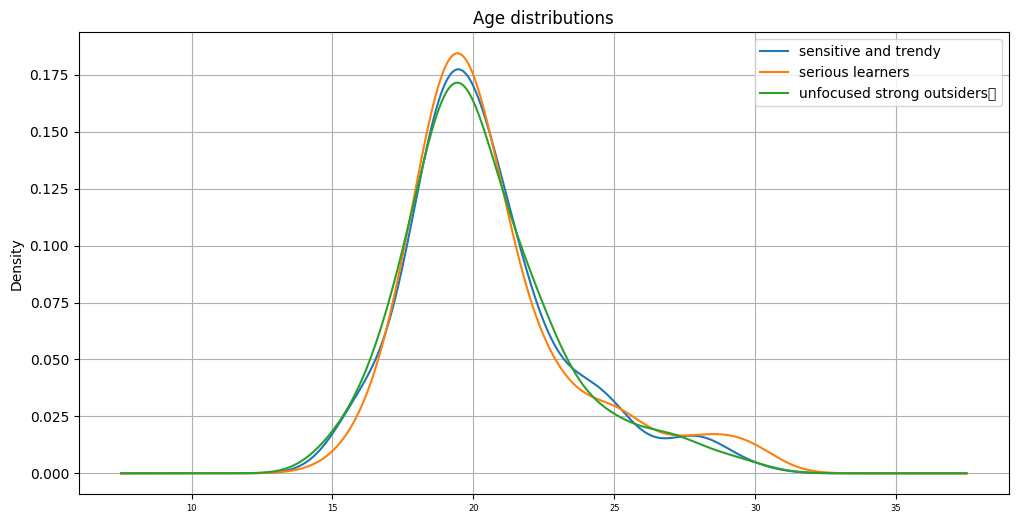

In [57]:
fig, ax = plt.subplots(figsize=(12,6))
pd.DataFrame(labeled_Xstd.loc[labeled_Xstd['cluster']=='sensitive and trendy','Age']).rename(columns={'Age':'sensitive and trendy'}).plot.density(ax=ax,legend=True)
pd.DataFrame(labeled_Xstd.loc[labeled_Xstd['cluster']=='serious learners','Age']).rename(columns={'Age':'serious learners'}).plot.density(ax=ax,legend=True)
pd.DataFrame(labeled_Xstd.loc[labeled_Xstd['cluster']=='unfocused strong outsiders','Age']).rename(columns={'Age':'unfocused strong outsiders	'}).plot.density(ax=ax,legend=True)
ax.set_title('Age distributions')
ax.grid()
plt.show()

Looking at the age distribution for each cluster, we can conclude that it is almost the same.

Now, let's perform the same analysis on the data scaled using the Min-Max Scaler.

In [58]:
counts_mm = labeled_Xmm.groupby('cluster').sum().drop(columns=['Age','Height','Weight','Number of siblings'])
display(counts_mm)
display(counts_mm/counts_mm.sum())

Gender_female  Gender_male  Hand_left  Hand_right  \
cluster                                                                         
sensitive and trendy                  223           28         20         233   
serious learners                      123           86         19         190   
unfocused strong outsiders             44          165         27         182   

                            Education_college/bachelor degree  \
cluster                                                         
sensitive and trendy                                       54   
serious learners                                           50   
unfocused strong outsiders                                 44   

                            Education_currently a primary school pupil  \
cluster                                                                  
sensitive and trendy                                                 2   
serious learners                                                     3   
unfocused strong outsiders                                           1   

                            Education_doctorate degree  \
cluster                                                  
sensitive and trendy                                 1   
serious learners                                     1   
unfocused strong outsiders                           1   

                            Education_masters degree  \
cluster                                                
sensitive and trendy                              22   
serious learners                                  21   
unfocused strong outsiders                        14   

                            Education_primary school  \
cluster                                                
sensitive and trendy                              18   
serious learners                                  11   
unfocused strong outsiders                        21   

                            Education_secondary school  Only child_no  \
cluster                                                                 
sensitive and trendy                               156            194   
serious learners                                   122            153   
unfocused strong outsiders                         130            151   

                            Only child_yes  Home Town Type_city  \
cluster                                                           
sensitive and trendy                    59                  179   
serious learners                        56                  140   
unfocused strong outsiders              60                  154   

                            Home Town Type_village  Home Type_block of flats  \
cluster                                                                        
sensitive and trendy                            71                       147   
serious learners                                69                       115   
unfocused strong outsiders                      56                       131   

                            Home Type_house/bungalow  
cluster                                               
sensitive and trendy                             106  
serious learners                                  93  
unfocused strong outsiders                        79

Gender_female  Gender_male  Hand_left  Hand_right  \
cluster                                                                         
sensitive and trendy             0.571795     0.100358   0.303030    0.385124   
serious learners                 0.315385     0.308244   0.287879    0.314050   
unfocused strong outsiders       0.112821     0.591398   0.409091    0.300826   

                            Education_college/bachelor degree  \
cluster                                                         
sensitive and trendy                                 0.364865   
serious learners                                     0.337838   
unfocused strong outsiders                           0.297297   

                            Education_currently a primary school pupil  \
cluster                                                                  
sensitive and trendy                                          0.333333   
serious learners                                              0.500000   
unfocused strong outsiders                                    0.166667   

                            Education_doctorate degree  \
cluster                                                  
sensitive and trendy                          0.333333   
serious learners                              0.333333   
unfocused strong outsiders                    0.333333   

                            Education_masters degree  \
cluster                                                
sensitive and trendy                        0.385965   
serious learners                            0.368421   
unfocused strong outsiders                  0.245614   

                            Education_primary school  \
cluster                                                
sensitive and trendy                            0.36   
serious learners                                0.22   
unfocused strong outsiders                      0.42   

                            Education_secondary school  Only child_no  \
cluster                                                                 
sensitive and trendy                          0.382353       0.389558   
serious learners                              0.299020       0.307229   
unfocused strong outsiders                    0.318627       0.303213   

                            Only child_yes  Home Town Type_city  \
cluster                                                           
sensitive and trendy              0.337143             0.378436   
serious learners                  0.320000             0.295983   
unfocused strong outsiders        0.342857             0.325581   

                            Home Town Type_village  Home Type_block of flats  \
cluster                                                                        
sensitive and trendy                      0.362245                  0.374046   
serious learners                          0.352041                  0.292621   
unfocused strong outsiders                0.285714                  0.333333   

                            Home Type_house/bungalow  
cluster                                               
sensitive and trendy                        0.381295  
serious learners                            0.334532  
unfocused strong outsiders                  0.284173

Apart for the _Only child_ label that now shows the majority of only children to be _unfocused strong outsiders_ and the majority of individuals with siblings to be _sensitive and trendy_, the other features present an analogous trend. Less people have been classified as _serious learners_ making the division betwenn males and females even more feasible.

C:\Users\ghiot\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


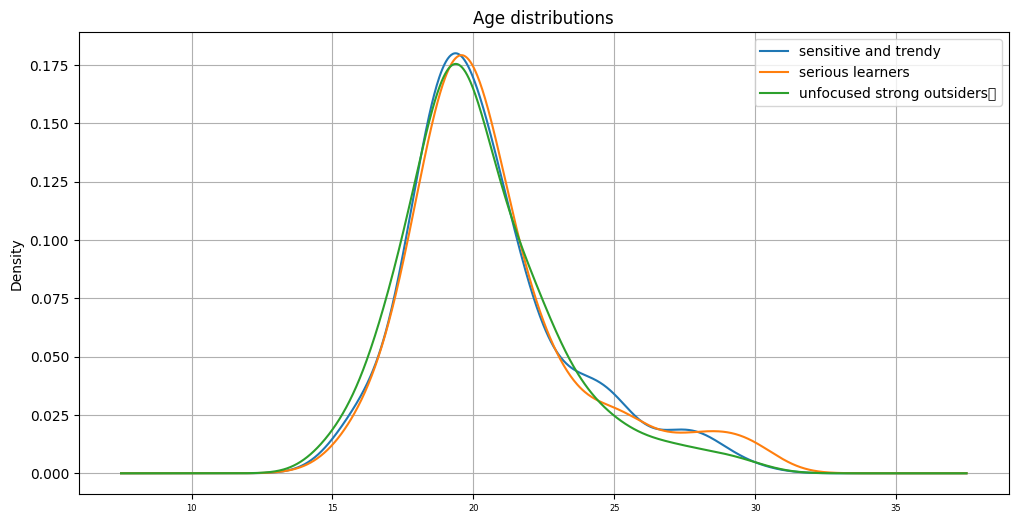

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
pd.DataFrame(labeled_Xmm.loc[labeled_Xmm['cluster']=='sensitive and trendy','Age']).rename(columns={'Age':'sensitive and trendy'}).plot.density(ax=ax,legend=True)
pd.DataFrame(labeled_Xmm.loc[labeled_Xmm['cluster']=='serious learners','Age']).rename(columns={'Age':'serious learners'}).plot.density(ax=ax,legend=True)
pd.DataFrame(labeled_Xmm.loc[labeled_Xmm['cluster']=='unfocused strong outsiders','Age']).rename(columns={'Age':'unfocused strong outsiders	'}).plot.density(ax=ax,legend=True)
ax.set_title('Age distributions')
ax.grid()
plt.show()

Also in this case the three age distributions are almost aligned.

Let's now compute the overall silouette score and the one for each cluster, to perform an internal evaluation of the clusters we found 

In [60]:
overall_sil_std= silhouette_score(pca_Xstd_m, km_best_std.labels_)
overall_sil_mm= silhouette_score(pca_Xmm_m, km_best_mm.labels_)

single_sil_std = silhouette_samples(pca_Xstd_m, km_best_std.labels_)
single_sil_mm = silhouette_samples(pca_Xmm_m, km_best_mm.labels_)

labeled_Xstd['Silhouette']=single_sil_std
labeled_Xmm['Silhouette']=single_sil_mm

cluster_sil_std = labeled_Xstd.groupby('cluster')['Silhouette'].mean()
cluster_sil_mm = labeled_Xstd.groupby('cluster')['Silhouette'].mean()

print('----------------------------------------------')
print('STANDARD SCALED DATA')
display(cluster_sil_std)
print('Overall silhouette score: ',overall_sil_std)
print('----------------------------------------------')
print('MIN-MAX SCALED DATA')
display(cluster_sil_mm)
print('Overall silhouette score: ',overall_sil_mm)
print('----------------------------------------------')

----------------------------------------------
STANDARD SCALED DATA


cluster
sensitive and trendy          0.200500
serious learners              0.159013
unfocused strong outsiders    0.181420
Name: Silhouette, dtype: float64

Overall silhouette score:  0.1809844956895929
----------------------------------------------
MIN-MAX SCALED DATA


cluster
sensitive and trendy          0.200500
serious learners              0.159013
unfocused strong outsiders    0.181420
Name: Silhouette, dtype: float64

Overall silhouette score:  0.18645345827502607
----------------------------------------------


As we can see from the silhouette score values, the data transformed with both the Standard Scaler and the Min-Max Scaler give very similar results. In general, the metric shows very low values, both for individual clusters and overall, because, as we noticed earlier, the centroids are relatively close, and the samples in the scatter plots look more like one large, misshaped cloud rather than three distinct groups of points.

The cluster that is the most compact and distant from the others is _sensitive and trendy_, followed by _unfocused strong outsiders_. The worst-performing cluster is _serious learners_. Looking back at the graph with the centroids' coordinates, we can see that the centroid of the _sensitive and trendy_ cluster is the only one with a positive value on its homonym axis. So, distinguishing this cluster from the other two is easier based on this characteristic.

As a final point, we observe that the overall silhouette score is slightly higher for the data transformed with the Min-Max Scaler. This might be because it alters the original point distribution slightly less, especially in terms of their variance, making the clusters a bit harder to separate.